In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score as ras
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier

## Zapoznanie ze zbiorem danych



In [ ]:
pip install covid19dh

In [ ]:
from covid19dh import covid19
#data and references to the data sources
dataWorld, src = covid19(verbose = False)

In [ ]:
print(dataWorld.shape)
print(type(dataWorld))

(190422, 47)
<class 'pandas.core.frame.DataFrame'>


Dane to DataFrame zawierający około 189 tysięcy obserwacji opisanych za pomocą 47 cech.

In [ ]:
dataWorld.head(5)

,id,date,confirmed,deaths,recovered,tests,vaccines,people_vaccinated,people_fully_vaccinated,hosp,...,iso_alpha_3,iso_alpha_2,iso_numeric,iso_currency,key_local,key_google_mobility,key_apple_mobility,key_jhu_csse,key_nuts,key_gadm
150732,0094b645,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LCA,LC,662.0,XCD,NaN,NaN,NaN,LC,NaN,LCA
150733,0094b645,2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LCA,LC,662.0,XCD,NaN,NaN,NaN,LC,NaN,LCA
150734,0094b645,2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LCA,LC,662.0,XCD,NaN,NaN,NaN,LC,NaN,LCA
150735,0094b645,2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LCA,LC,662.0,XCD,NaN,NaN,NaN,LC,NaN,LCA
150736,0094b645,2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LCA,LC,662.0,XCD,NaN,NaN,NaN,LC,NaN,LCA


In [ ]:
dataWorld.tail(5)

,id,date,confirmed,deaths,recovered,tests,vaccines,people_vaccinated,people_fully_vaccinated,hosp,...,iso_alpha_3,iso_alpha_2,iso_numeric,iso_currency,key_local,key_google_mobility,key_apple_mobility,key_jhu_csse,key_nuts,key_gadm
117561,fd169ad6,2022-05-09,17271.0,83.0,17140.0,115981.0,70568.0,26729.0,26404.0,NaN,...,LIE,LI,438.0,CHF,NaN,ChIJ_S9HHUQxm0cRibFa3Ta16mA,NaN,LI,NaN,LIE
117562,fd169ad6,2022-05-10,17271.0,83.0,17154.0,NaN,NaN,NaN,NaN,NaN,...,LIE,LI,438.0,CHF,NaN,ChIJ_S9HHUQxm0cRibFa3Ta16mA,NaN,LI,NaN,LIE
117563,fd169ad6,2022-05-11,NaN,NaN,17166.0,NaN,NaN,NaN,NaN,NaN,...,LIE,LI,438.0,CHF,NaN,ChIJ_S9HHUQxm0cRibFa3Ta16mA,NaN,LI,NaN,LIE
117564,fd169ad6,2022-05-12,NaN,NaN,17166.0,NaN,NaN,NaN,NaN,NaN,...,LIE,LI,438.0,CHF,NaN,ChIJ_S9HHUQxm0cRibFa3Ta16mA,NaN,LI,NaN,LIE
117565,fd169ad6,2022-05-13,NaN,NaN,17179.0,NaN,NaN,NaN,NaN,NaN,...,LIE,LI,438.0,CHF,NaN,ChIJ_S9HHUQxm0cRibFa3Ta16mA,NaN,LI,NaN,LIE


## Cel zadania oraz wybór kraju do predykcji lokalnej

Celem zadania jest sprawdzenie czy na podstawie dostarczonych danych można dokonać globalnej i lokalnej predykcji:


*   liczby zachorowań
*   liczby zgonów spowodowanych chorobą COVID-19

Modele predykcji lokalnej bedę wykonywać dla danych dostarczonych przez Hiszpanie. 


In [ ]:
dataLocal, src = covid19("Spain", verbose = False) 

In [ ]:
print(dataLocal.shape)
print(type(dataLocal))

(843, 47)
<class 'pandas.core.frame.DataFrame'>


Dla Hiszpanii otrzymujemy 839 obserwacji.

## Podstawowa eksploracja danych.

In [ ]:
print(*list(dataWorld.columns), sep = "\n")

id
date
confirmed
deaths
recovered
tests
vaccines
people_vaccinated
people_fully_vaccinated
hosp
icu
vent
school_closing
workplace_closing
cancel_events
gatherings_restrictions
transport_closing
stay_home_restrictions
internal_movement_restrictions
international_movement_restrictions
information_campaigns
testing_policy
contact_tracing
facial_coverings
vaccination_policy
elderly_people_protection
government_response_index
stringency_index
containment_health_index
economic_support_index
administrative_area_level
administrative_area_level_1
administrative_area_level_2
administrative_area_level_3
latitude
longitude
population
iso_alpha_3
iso_alpha_2
iso_numeric
iso_currency
key_local
key_google_mobility
key_apple_mobility
key_jhu_csse
key_nuts
key_gadm


Kolumny możemy podzielić na:

1. Identyfikatory:


*   id- unikalny identyfikator dla obszaru geograficznego
*   date- data obserwacji



2. Zmienne emidemiologiczne:

Poniższe kolumny przedstawiają wartości skumulowane, tj. wartość w danym dniu to suma wszytskich poprzednich obserwacji i obserwacji bieżącej.
<br>
*   confirmed- liczba potwierdzzonych przypadków
*   deaths- liczba śmierci 
*   recovered- liczba pacjentów, którzy wyzdrowieli
*   tests- liczba przeprowadzonych testów
*   vaccines- liczba zarejestrowanych dawek szczepionek
*   people_vaccinated- liczba osób, które przyjęły choć jedną dawkę szczepionki
*   people_fully_vaccinated- liczba osób w pełni zaszczepionych

Pozostałe kolumny w terj kategorii nie przedstawiają wartości skumulowanych.

*   hosp- liczba pacjentów hospitalizowanych w danym dniu
*   icu- liczba pacjentów hospitalizowanych na oddziale intensywnej terapii w danym dniu
*   vent- liczba pacjentów wymagających respiratora(?) w danym dniu
*   population- całkowita populacja

Wszystkie wyżej wymienione kolumny są dyskretnymi zmiennymi ilościowymi.





3. Środki polityki: 

Zmienne, dla których kody oznaczają politykę rządową obowiązującą w danym regionie.

*  school_closing
*  workplace_closing
*  cancel_events
*  gatherings_restrictions
* transport_closing
* stay_home_restrictions
*   internal_movement_restrictions
*   international_movement_restrictions
*   information_campaigns
*   testing_policy
*   contact_tracing
* facial_coverings
*   vaccination_policy
*   elderly_people_protection

Wartości kodów:

liczby całkowite dodatnie - polityki stosowane w całym obszarze administracyjnym.

liczby całkowite ujemne - polityki, które najlepiej odzwierciedlają obowiązujące zasady, ale mogą nie odzwierciedlać rzeczywistego stanu danego obszaru.

znak minus - rozróżnienie dwóch przypadków, nie należy go traktować jako rzeczywistej wartości ujemnej.

Są to zmienne kategoryczne nominalne.


---




Zmienne, których wartość określa ogólne wrażenie na temat aktywności rządu w danym regionie:


* government_response_index
* stringency_index
* containment_health_index
* economic_support_index

Występowanie znaku minus jest równoznaczne z dziedziczeniem ineksu po wyższym poziomie i spowodowane brakiem zapewnienia indeksu w sposób bezpośredni.


Również są to zmienne kateogryczne.

4. Obszary administracyjne:


* administrative_area_level
* administrative_area_level_1
* administrative_area_level_2
* administrative_area_level_3


Zmienne kateogryczne.



5. Koordynaty:


*   latitude- serokość geograficzna
*  longitude- długość geograficzna

Zmienne numeryczne ciągłe.



6. Kody ISO: 

*   iso_alpha_3
*   iso_alpha_2
*   iso_numeric
*  iso_currency

Zmienne kateogryczne.


7. Klucze zewnętrzne: 


*   key_local
*   key_google_mobility
*   key_apple_mobility
*   key_jhu_csse
*   key_nuts
*   key_gadm

Zmienne kateogryczne.

In [ ]:
def lackOfData(dataframe):
  return 100 * dataframe.isnull().sum() / dataframe.shape[0]

Sprawdźmy jak duże braki danych rejestrujemy dla poszczególnych zmiennych w zależności od zbioru danych:

In [ ]:
pd.DataFrame({
    'Global': lackOfData(dataWorld),
    'Local': lackOfData(dataLocal)
})

,Global,Local
id,0.000000,0.000000
date,0.000000,0.000000
confirmed,8.650786,1.186240
deaths,17.079434,4.863582
recovered,63.041560,92.289442
tests,58.806230,6.761566
vaccines,74.530779,64.650059
people_vaccinated,75.770132,64.175563
people_fully_vaccinated,77.007909,65.005931
hosp,82.990936,24.673784


Dodatkowo zwróćmy uwagę na liczbę etykiet, każdej ze zmiannych:


In [ ]:
labelsGlobal = []
labelsLocal = []
for col in dataWorld:
    labelsGlobal.append(len(dataWorld[col].unique()))
    labelsLocal.append(len(dataLocal[col].unique()))

In [ ]:
pd.DataFrame({
    'Variable' : dataWorld.columns,
    'Labels global': labelsGlobal,
    'Labels local': labelsLocal
})

,Variable,Labels global,Labels local
0,id,236,1
1,date,866,843
2,confirmed,92090,569
3,deaths,30817,546
4,recovered,48114,66
5,tests,76696,787
6,vaccines,46865,299
7,people_vaccinated,44050,303
8,people_fully_vaccinated,41097,296
9,hosp,9252,616


Na tym etapie jesteśmy już w stanie odrzucić część z 47 zmiennych, gdyż z różnych przyczyn nie byłyby raczej użyteczne w tworzeniu modeli:


1.   id- służy tylko do identyfikacji
 <br>  <br>
2.   hosp
3. icu
4. vent <br><br>
Wydaje mi się, że zmienne można pominąć ze względu na to, że mówią nam one raczej o skutkach liczby zachorowań a nie stanowią przyczyny. Dodatkowo zawierają braki na tak wysokim poziomie, że ich sensowne uzupełnienie nie jest możliwe.

 <br>
5. economic_support_index- zmienna mówi o wsparciu ekonomicznym dla obywateli, nie wydaje być istotnym aspektem
  <br><br>
6. administrative_area_level
7. administrative_area_level_1
8. administrative_area_level_2
9. administrative_area_level_3 <br><br>

Jest to grupa zmiennych, która informuje o nazwie obszaru administracyjnego, nie stanowi to informacji samej w sobie. <br><br>
 10. latitude
 11. longitude
 <br><br>
Szerokość i długość geograficzna, również nie stanowią przydatnej informacji w tym przypadku.<br><br>

12. iso_alpha_3
13. iso_alpha_2
14. iso_numeric <br><br>
Zakodowane nazwu państw, również brak istotnej informacji niesionej przez te zmienne.
<br><br>
15. iso_currency- zmienna informująca o walucie, nie wydaje być istotnym aspektem.
<br><br>
16. key_local
17. key_google_mobility
18. key_apple_mobility
19. key_jhu_csse
20. key_nuts
21. key_gadm<br><br>
Zmienne służące identyfikacji regionu administracyjnego, nieistotne w naszym przypadku.


In [ ]:
colListLocal = ['id', 'hosp', 'icu', 'vent','latitude', 'longitude', 'economic_support_index'
] + list(dataWorld.filter(regex='iso|administrative|key'))

colListGlobal = ['hosp', 'icu', 'vent','latitude', 'longitude', 'economic_support_index'
] + list(dataWorld.filter(regex='iso|administrative|key'))

dataWorld = dataWorld.drop(columns=colListGlobal, axis=1)
dataLocal = dataLocal.drop(columns=colListLocal, axis=1)

In [ ]:
print(dataWorld.shape, dataLocal.shape)

(190422, 27) (843, 26)


Widzimy, że sama podstawowa analiza parametrów pozwoliła nam zredukować ich liczbę z 47 do 26/27 (prawie o połowę; w przypadku danych globalnych kolumna id nie może zostać usunięta, gdyż będzie ona istotna przy czyszczeniu danych).
Kolejne decyzje bedę podejmować już na podstawie konkretnego zbioru danych- osobno dla danych globalnych i lokalnych.

## Dane lokalne

In [ ]:
labelsLocal = []
for col in dataLocal:
    labelsLocal.append(len(dataLocal[col].unique()))

pd.DataFrame({
    'Variable' : dataLocal.columns,
    'Labels local': labelsLocal
})

,Variable,Labels local
0,date,843
1,confirmed,569
2,deaths,546
3,recovered,66
4,tests,787
5,vaccines,299
6,people_vaccinated,303
7,people_fully_vaccinated,296
8,school_closing,7
9,workplace_closing,8


In [ ]:
pd.DataFrame({
    'Local': lackOfData(dataLocal)
})

,Local
date,0.000000
confirmed,1.186240
deaths,4.863582
recovered,92.289442
tests,6.761566
vaccines,64.650059
people_vaccinated,64.175563
people_fully_vaccinated,65.005931
school_closing,6.287070
workplace_closing,6.287070


Dla wszytskich zmiennych poza datą i populacją obserwujemy braki danych. 
<br><br> 
Jeżeli chodzi o wszytskie zmienne dotyczące polityki rządowej to braki występują na tym samym poziomie czyli około 6%. 
<br><br> 
Przyjrzyjmy się zmiennym po kolei, aby ustalić najelpszy sposób postępowania z nimi:

Zacznijmy od tych, które są kumulatywne, tj

* confirmed
* deaths
* recovered
* tests
* vaccines
* people_vaccinated
* people_fully_vaccinated



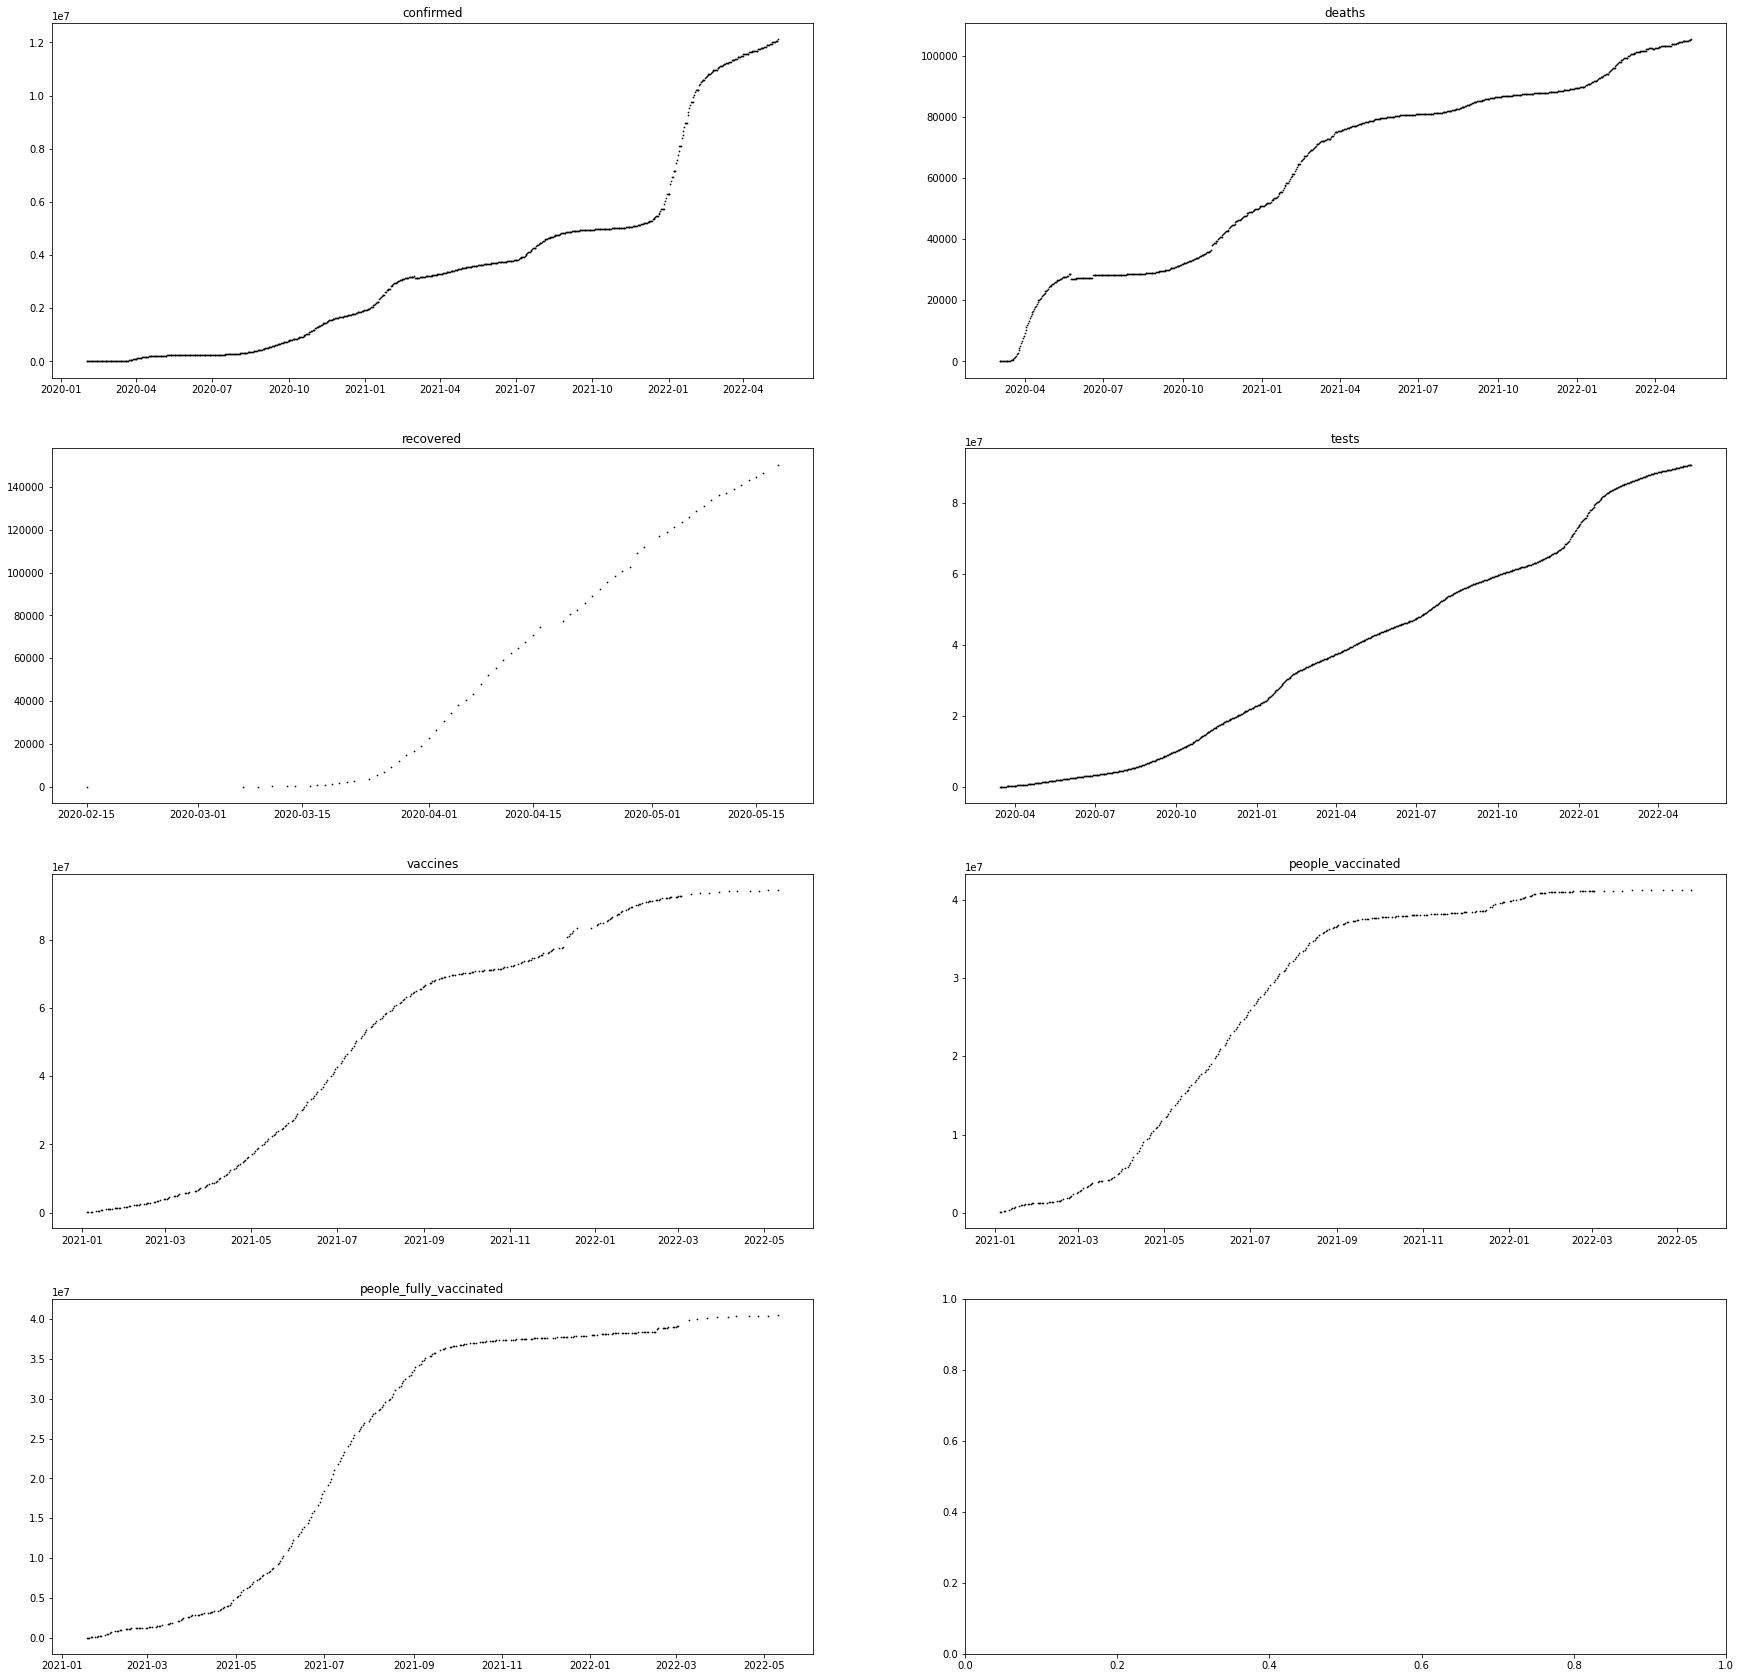

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(30, 30))

ax[0, 0].scatter(dataLocal['date'], dataLocal["confirmed"], s=0.5, c='black')
ax[0, 0].set_title("confirmed")

ax[0, 1].scatter(dataLocal['date'], dataLocal["deaths"], s=0.5, c='black')
ax[0, 1].set_title("deaths")

ax[1, 0].scatter(dataLocal['date'], dataLocal["recovered"], s=0.5, c='black')
ax[1, 0].set_title("recovered")

ax[1, 1].scatter(dataLocal['date'], dataLocal["tests"], s=0.5, c='black')
ax[1, 1].set_title("tests")

ax[2, 0].scatter(dataLocal['date'], dataLocal["vaccines"], s=0.5, c='black')
ax[2, 0].set_title("vaccines")

ax[2, 1].scatter(dataLocal['date'], dataLocal["people_vaccinated"], s=0.5, c='black')
ax[2, 1].set_title("people_vaccinated")

ax[3, 0].scatter(dataLocal['date'], dataLocal["people_fully_vaccinated"], s=0.5, c='black')
ax[3, 0].set_title("people_fully_vaccinated")

plt.show()

Uwagę od razu przykuwa brak ciągłąści niekórych zmiennych. 
<br>
1. "Najgorzej" wygląda wykres zmiennej mówiącej o ilości pacjentów, którzy wyzdrowieli. Po spojrzeniu do tabeli zauważamy, że braki są na poziomie 92%. Uważam, że raczej nie da się ich sensowownie uzupełnić dlatego podejmuję decyzję o usunięciu cechy.
<br><br> 
2. Dodatkowo niepokój budzi fakt, że dla zmiennych takich jak confirmed i deaths istnieją momenty, dla których wartość spada w czasie. Z racji, że mamy do czynienia ze zmeinnymi kumulatywnymi należy dane takie uznać za błędne i uzupełnić wartościami, które wyeliminują ten problem. 
<br> 
Wydaje mi się, że należy sprawdzić każda ze zmiennych czy przypadkiem problem nie występuje a jest np. niezauważalny na wykresie.
W przypadku wartości błędnej słusznym wydaje się zastąpienie błędnej wartości poprzednią- poprawną. 

In [ ]:
#1
dataLocal = dataLocal.drop(columns="recovered", axis=1)

In [ ]:
#2
cumulativeCols = ['confirmed', 'deaths', 'tests', 'vaccines', 'people_vaccinated', 'people_fully_vaccinated']

for col in cumulativeCols:
    copy = np.array(dataLocal.loc[:, col])
    for i in range(1, dataLocal.shape[0]):
      if copy[i -1] > copy[i]:
        copy[i] = copy[i-1]
    dataLocal[col] = copy

In [ ]:
pd.DataFrame({
    'Local': lackOfData(dataLocal[cumulativeCols])
})

,Local
confirmed,1.186240
deaths,4.863582
tests,6.761566
vaccines,64.650059
people_vaccinated,64.175563
people_fully_vaccinated,65.005931


Pozbyliśmy się niechcianych anomalii aczkolwiek dalej pozostaje problem jak postąpić w przypadku wartości brakujących. 
<br>
Część z nich występuje na początku zbioru danych co prawdopodobnie wiąże się z tym, że przypadków/zmarłych/szczepionek itd. jeszcze po prostu nie było. 
<br>Dlatego podejmuję decyzję o zastąpieniu nan'ów zerami, aż do wystąpienia pierwszej wartości niezerowej.

In [ ]:
dataLocal[cumulativeCols] = dataLocal[cumulativeCols].interpolate('zero', fill_value=0, limit_direction='backward')

In [ ]:
pd.DataFrame({
    'Local': lackOfData(dataLocal[cumulativeCols])
})

,Local
confirmed,0.000000
deaths,0.000000
tests,0.474496
vaccines,0.237248
people_vaccinated,0.237248
people_fully_vaccinated,0.237248


Od razu zauważamy, że braki zostały zredukowane praktycznie do zera (<1%). 

In [ ]:
dataLocal[cumulativeCols].tail(10)

,confirmed,deaths,tests,vaccines,people_vaccinated,people_fully_vaccinated
101600,11953481.0,104668.0,90639069.0,94485122.0,41209244.0,40439425.0
101601,11953481.0,104668.0,90709839.0,94485122.0,41209244.0,40439425.0
101602,12009059.0,104869.0,90781301.0,94485122.0,41209244.0,40439425.0
101603,12009059.0,104869.0,90815916.0,94485122.0,41209244.0,40439425.0
101604,12009059.0,104869.0,90844326.0,94485122.0,41209244.0,40439425.0
101605,12009059.0,104869.0,90924252.0,94485122.0,41209244.0,40439425.0
101606,12058888.0,105123.0,NaN,94485122.0,41209244.0,40439425.0
101607,12058888.0,105123.0,NaN,94567014.0,41216883.0,40460123.0
101608,12058888.0,105123.0,NaN,NaN,NaN,NaN
101609,12127122.0,105444.0,NaN,NaN,NaN,NaN


Pozostałe braki występują w 5 ostatnich wierszach dla szczepień i testów. 
<br> <br> 
W tym przypadku decyduję się postąpić inaczej niż dotychczas. Zastąpienie braków danych zerami lub ostatnią znaną wartością nijak nie pokrywałoby się z rzeczywistością. 
<br><br> 
Słusznym w tym momencie wydaje się dokonanie interpolacji na podstawie ostatnich 25 obserwacji. 


In [ ]:
dataLocal.loc[-5:, ["vaccines",	"people_vaccinated",	"people_fully_vaccinated"]] = dataLocal.loc[-25:, ["vaccines",	"people_vaccinated",	"people_fully_vaccinated"]].interpolate('linear')

Jeżeli chodzi o ilość wykonanych testów to dobrym rozwiązaniem wydaje się policzenie średniego stosunku potierdzonych przypadków do wykonanych testów z krótiego okresu poprzedzającego braki. Na tej podstawie możemy otrzymać wartość testów, która mogłaby być prawdopodobna w rzeczywistości.

In [ ]:
ratio = np.mean(dataLocal.iloc[815:825, 1]/dataLocal.iloc[815:825, 3])
ratio

0.13071302024712045

In [ ]:
dataLocal.iloc[826:, 3] = dataLocal.iloc[826:, 1]/ratio

In [ ]:
pd.DataFrame({
    'Local': lackOfData(dataLocal[cumulativeCols])
})

,Local
confirmed,0.0
deaths,0.0
tests,0.0
vaccines,0.0
people_vaccinated,0.0
people_fully_vaccinated,0.0


Widzmy, że nie ma już braków danych dla zamiennych skumulowanych.

In [ ]:
pd.DataFrame({
    'Local': lackOfData(dataLocal)
})

,Local
date,0.000000
confirmed,0.000000
deaths,0.000000
tests,0.000000
vaccines,0.000000
people_vaccinated,0.000000
people_fully_vaccinated,0.000000
school_closing,6.287070
workplace_closing,6.287070
cancel_events,6.287070


Teraz skupie się na pozostałych zmiennych, w których wciąż występują nan'y.

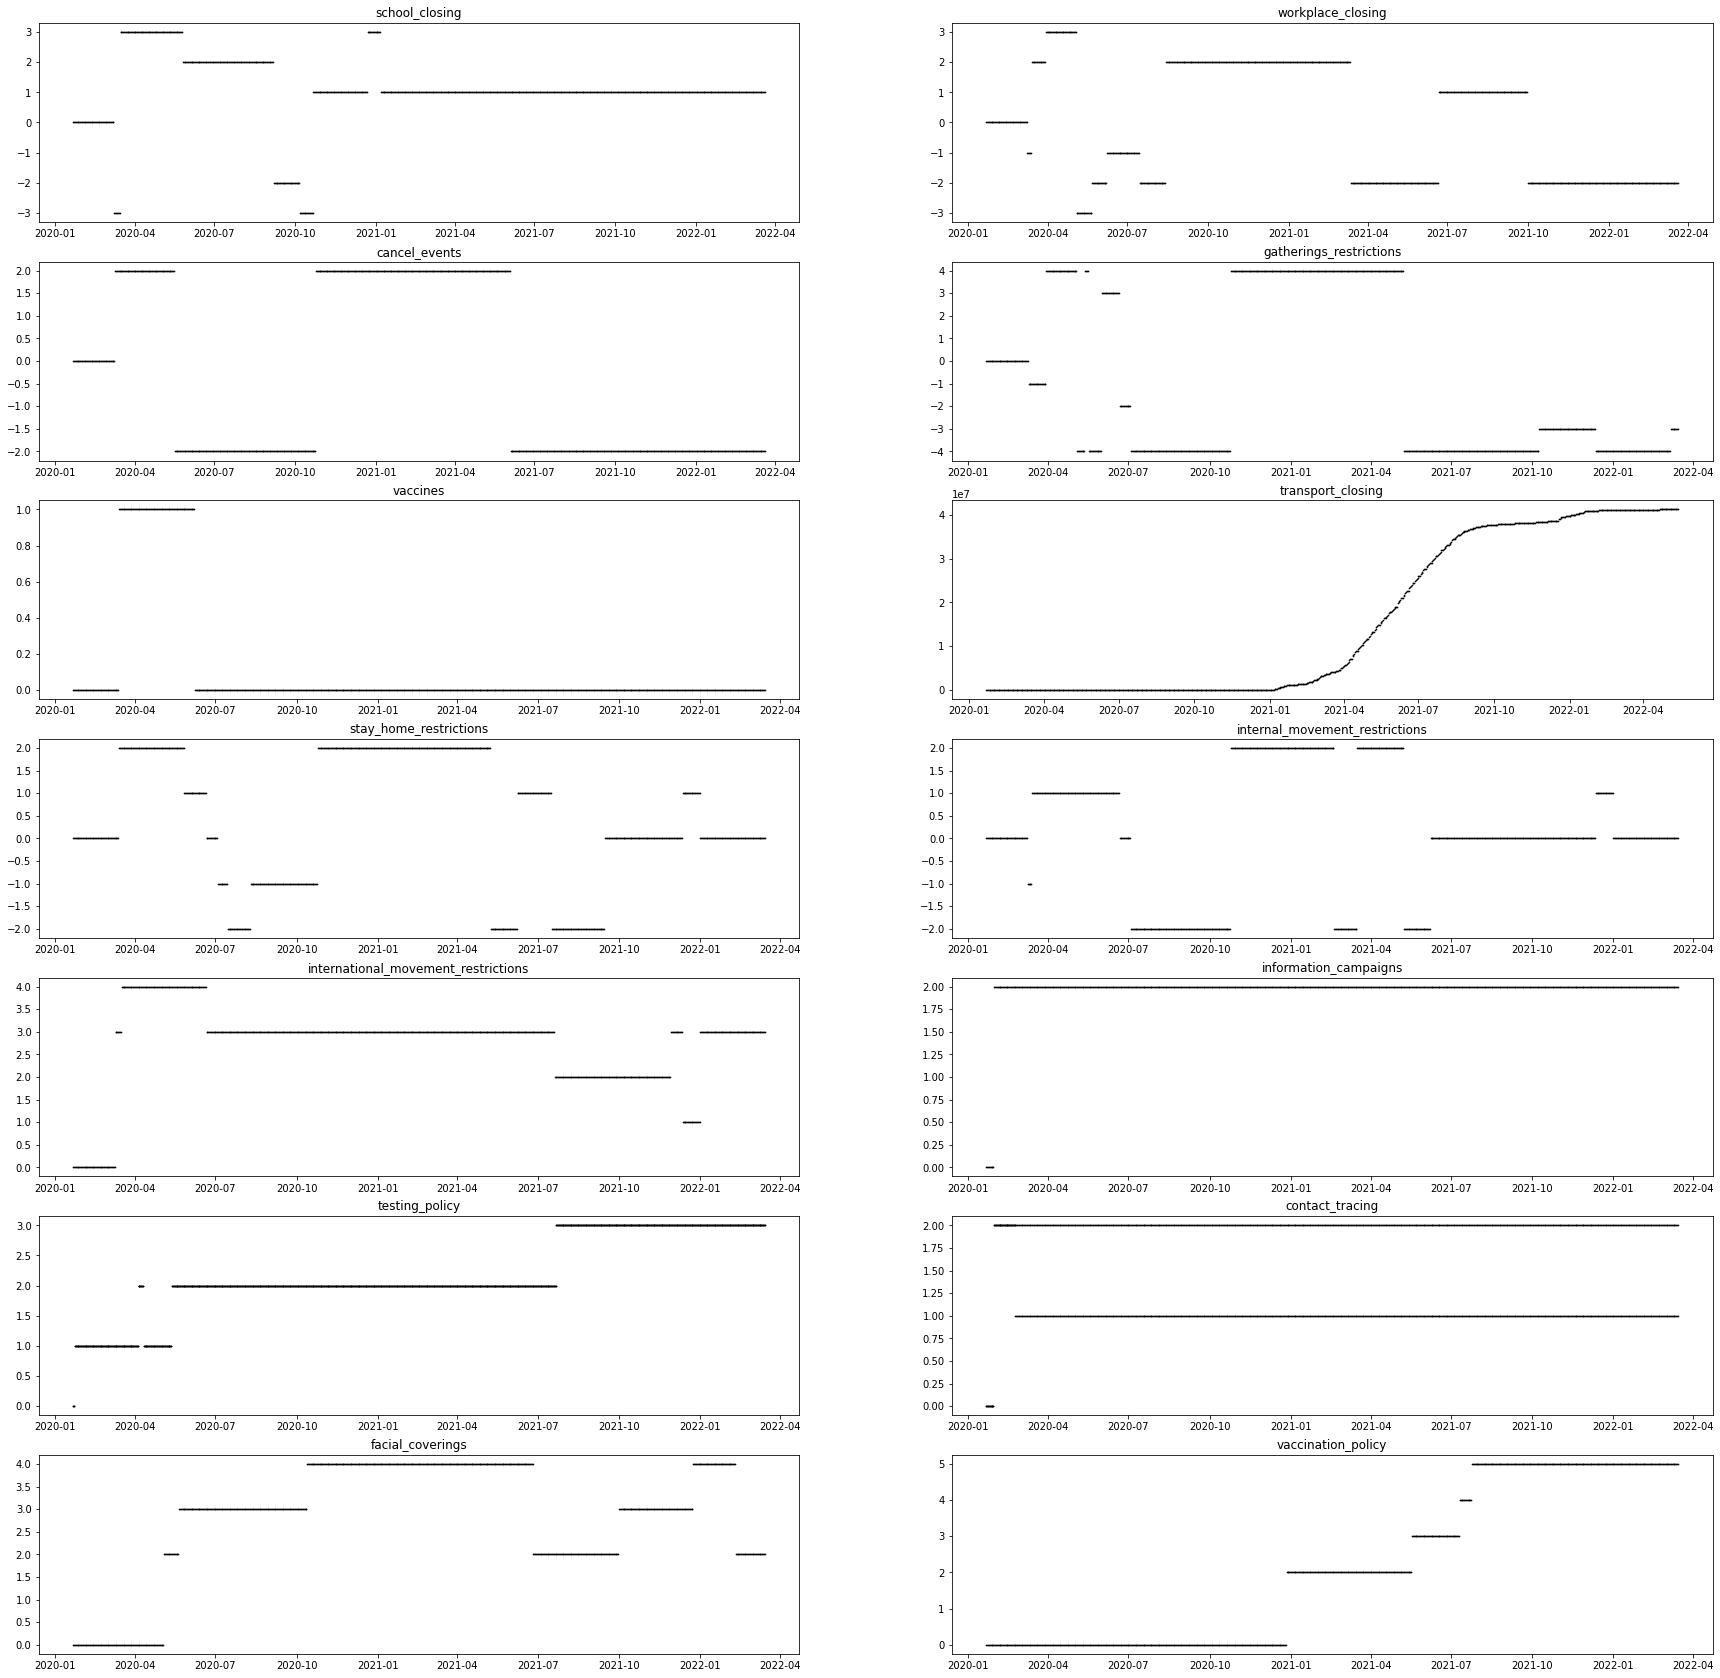

In [ ]:
fig, ax = plt.subplots(7, 2, figsize=(30, 30))

ax[0, 0].scatter(dataLocal['date'], dataLocal["school_closing"], s=0.5, c='black')
ax[0, 0].set_title("school_closing")

ax[0, 1].scatter(dataLocal['date'], dataLocal["workplace_closing"], s=0.5, c='black')
ax[0, 1].set_title("workplace_closing")

ax[1, 0].scatter(dataLocal['date'], dataLocal["cancel_events"], s=0.5, c='black')
ax[1, 0].set_title("cancel_events")

ax[1, 1].scatter(dataLocal['date'], dataLocal["gatherings_restrictions"], s=0.5, c='black')
ax[1, 1].set_title("gatherings_restrictions")

ax[2, 0].scatter(dataLocal['date'], dataLocal["transport_closing"], s=0.5, c='black')
ax[2, 0].set_title("vaccines")

ax[2, 1].scatter(dataLocal['date'], dataLocal["people_vaccinated"], s=0.5, c='black')
ax[2, 1].set_title("transport_closing")

ax[3, 0].scatter(dataLocal['date'], dataLocal["stay_home_restrictions"], s=0.5, c='black')
ax[3, 0].set_title("stay_home_restrictions")

ax[3, 1].scatter(dataLocal['date'], dataLocal["internal_movement_restrictions"], s=0.5, c='black')
ax[3, 1].set_title("internal_movement_restrictions")

ax[4, 0].scatter(dataLocal['date'], dataLocal["international_movement_restrictions"], s=0.5, c='black')
ax[4, 0].set_title("international_movement_restrictions")

ax[4, 1].scatter(dataLocal['date'], dataLocal["information_campaigns"], s=0.5, c='black')
ax[4, 1].set_title("information_campaigns")

ax[5, 0].scatter(dataLocal['date'], dataLocal["testing_policy"], s=0.5, c='black')
ax[5, 0].set_title("testing_policy")

ax[5, 1].scatter(dataLocal['date'], dataLocal["information_campaigns"], s=0.5, c='black')
ax[5, 1].set_title("information_campaigns")

ax[5, 0].scatter(dataLocal['date'], dataLocal["testing_policy"], s=0.5, c='black')
ax[5, 0].set_title("testing_policy")

ax[5, 1].scatter(dataLocal['date'], dataLocal["contact_tracing"], s=0.5, c='black')
ax[5, 1].set_title("contact_tracing")

ax[6, 0].scatter(dataLocal['date'], dataLocal["facial_coverings"], s=0.5, c='black')
ax[6, 0].set_title("facial_coverings")

ax[6, 1].scatter(dataLocal['date'], dataLocal["vaccination_policy"], s=0.5, c='black')
ax[6, 1].set_title("vaccination_policy")

plt.show()

In [ ]:
dataLocal.tail(100)

,date,confirmed,deaths,tests,vaccines,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,...,information_campaigns,testing_policy,contact_tracing,facial_coverings,vaccination_policy,elderly_people_protection,government_response_index,stringency_index,containment_health_index,population
101510,2022-02-03,10199716.0,94040.0,8.296646e+07,90715372.0,40942994.0,38316906.0,1.0,-2.0,-2.0,...,2.0,3.0,1.0,4.0,5.0,-3.0,64.32,46.76,61.01,46796540.0
101511,2022-02-04,10199716.0,94040.0,8.315536e+07,90715372.0,40942994.0,38316906.0,1.0,-2.0,-2.0,...,2.0,3.0,1.0,4.0,5.0,-3.0,64.32,46.76,61.01,46796540.0
101512,2022-02-05,10199716.0,94040.0,8.324821e+07,90715372.0,40942994.0,38316906.0,1.0,-2.0,-2.0,...,2.0,3.0,1.0,4.0,5.0,-3.0,64.32,46.76,61.01,46796540.0
101513,2022-02-06,10199716.0,94040.0,8.332068e+07,90943374.0,40958312.0,38327784.0,1.0,-2.0,-2.0,...,2.0,3.0,1.0,4.0,5.0,-3.0,64.32,46.76,61.01,46796540.0
101514,2022-02-07,10395471.0,94570.0,8.351879e+07,91101392.0,40965263.0,38351440.0,1.0,-2.0,-2.0,...,2.0,3.0,1.0,4.0,5.0,-3.0,64.32,46.76,61.01,46796540.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101605,2022-05-09,12009059.0,104869.0,9.187347e+07,94485122.0,41209244.0,40439425.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46796540.0
101606,2022-05-10,12058888.0,105123.0,9.225468e+07,94485122.0,41209244.0,40439425.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46796540.0
101607,2022-05-11,12058888.0,105123.0,9.225468e+07,94567014.0,41216883.0,40460123.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46796540.0
101608,2022-05-12,12058888.0,105123.0,9.225468e+07,94567014.0,41216883.0,40460123.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46796540.0


Po przesglądnięciu danych zauważamy, że braki w kolumnach odpowiadających za politykę rządową względem covida zaczynają się konkretnego dnia i występują aż do końca zbioru.
<br> 
Jako, że stanowią one tylko ok. 6% całego zbioru wydaje mi się, że można je po prostu usunąć. 

In [ ]:
idx = dataLocal[dataLocal['date'] == '2022-03-16'].index
rowNum = dataLocal.index.get_loc(idx[0])
dataLocal = dataLocal.drop(dataLocal.index[rowNum:])
dataLocal.shape

(784, 25)

In [ ]:
pd.DataFrame({
    'Local': lackOfData(dataLocal)
})

,Local
date,0.0
confirmed,0.0
deaths,0.0
tests,0.0
vaccines,0.0
people_vaccinated,0.0
people_fully_vaccinated,0.0
school_closing,0.0
workplace_closing,0.0
cancel_events,0.0


Po wykonanych operacjach dane zawierają 784 obserwacje, z których pozbyliśmy się braków.

## Wybór kolumn do regresji liniowych

In [ ]:
corr = dataLocal.corr()
corr.style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,confirmed,deaths,tests,vaccines,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,facial_coverings,vaccination_policy,elderly_people_protection,government_response_index,stringency_index,containment_health_index,population
confirmed,1.000000,0.874341,0.962518,0.900050,0.872784,0.857593,-0.059340,-0.420407,-0.335797,-0.343010,-0.351504,-0.152558,0.032197,-0.086401,0.114370,0.779493,-0.099406,0.239776,0.878311,-0.691202,0.236415,-0.254225,0.208666,nan
deaths,0.874341,1.000000,0.948587,0.813568,0.838643,0.792297,-0.021464,-0.399789,-0.270190,-0.280429,-0.431830,-0.135351,0.050303,-0.014204,0.200361,0.835557,-0.174147,0.479814,0.904711,-0.379948,0.442396,-0.082268,0.401589,nan
tests,0.962518,0.948587,1.000000,0.933920,0.933585,0.909355,-0.076423,-0.427164,-0.358800,-0.372280,-0.410174,-0.184049,0.034148,-0.156792,0.130256,0.842247,-0.113214,0.298389,0.955999,-0.593352,0.256642,-0.272773,0.222044,nan
vaccines,0.900050,0.813568,0.933920,1.000000,0.991004,0.993165,-0.043339,-0.450574,-0.561328,-0.552729,-0.278867,-0.321122,-0.051348,-0.246213,0.085614,0.834493,-0.074413,0.046877,0.942150,-0.651682,0.076384,-0.426685,0.032543,nan
people_vaccinated,0.872784,0.838643,0.933585,0.991004,1.000000,0.989437,-0.045755,-0.441903,-0.554981,-0.562011,-0.294550,-0.347809,-0.059929,-0.259533,0.090429,0.833346,-0.078598,0.055223,0.960707,-0.563814,0.076952,-0.427430,0.029798,nan
people_fully_vaccinated,0.857593,0.792297,0.909355,0.993165,0.989437,1.000000,-0.042178,-0.420589,-0.579539,-0.554919,-0.271256,-0.333270,-0.050408,-0.275791,0.083278,0.843974,-0.072382,0.020944,0.941593,-0.595952,0.056360,-0.441528,0.009627,nan
school_closing,-0.059340,-0.021464,-0.076423,-0.043339,-0.045755,-0.042178,1.000000,-0.093855,0.189771,0.205690,0.484247,0.295616,0.315310,0.383504,0.096298,-0.058578,-0.083699,-0.080804,-0.032516,0.078522,0.311114,0.371817,0.311247,nan
workplace_closing,-0.420407,-0.399789,-0.427164,-0.450574,-0.441903,-0.420589,-0.093855,1.000000,0.328712,0.373336,0.120792,0.189878,0.083377,0.102666,-0.004456,-0.354285,0.003873,-0.193714,-0.393640,0.405003,0.034846,0.298389,0.050843,nan
cancel_events,-0.335797,-0.270190,-0.358800,-0.561328,-0.554981,-0.579539,0.189771,0.328712,1.000000,0.821528,0.254435,0.652027,0.490479,0.223034,-0.022613,-0.560297,0.019654,0.068246,-0.422361,0.318863,0.192317,0.518350,0.269010,nan
gatherings_restrictions,-0.343010,-0.280429,-0.372280,-0.552729,-0.562011,-0.554919,0.205690,0.373336,0.821528,1.000000,0.170848,0.772278,0.639705,0.204041,-0.029557,-0.448660,0.025690,0.107605,-0.431187,0.304751,0.174048,0.448516,0.229829,nan


Na podstawie macierzy korelacji decyduje się na odrzucenie kolumn, dla których korelacja ze zmiennymi objaśnianymi jest zbyt niska.
<br> <br> 
Dla zmiennej confirmed zostawiam:<br>
1. deaths
2. tests
3. vaccines	
4. people_vaccinated	
5. people_fully_vaccinated	
6. testing_policy
7. vaccination_policy
8. elderly_people_protection
<br> <br> 

Natomiast dla zmiennej deaths:<br>
1. confirmed
2. tests
3. vaccines	
4. people_vaccinated	
5. people_fully_vaccinated	
6. testing_policy
7. facial_coverings
8. vaccination_policy

## Utworzenie modeli na podstawie danych lokalnych dla zmiennych:
## a) confirmed





In [ ]:
colsConfirmed = ['deaths',
 'tests',
 'vaccines',
 'people_vaccinated',
 'people_fully_vaccinated',
 'testing_policy',
 'vaccination_policy',
 'elderly_people_protection'
 ]

## Modele regresji liniowej:




In [ ]:
resConfirmedLocal = pd.DataFrame(index=[colsConfirmed], columns = ['R2 train', 'R2 test', 'RMSE train', 'RMSE test'])  

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(dataLocal[colsConfirmed], dataLocal[["confirmed"]], 
                                            test_size=0.2, random_state=0)

In [ ]:
for idx, col in enumerate(colsConfirmed):
  reg = LinearRegression()

  reg.fit(np.array(xTrain[[col]], dtype = np.float64).reshape(-1, 1), yTrain)

  predTrain = reg.predict(np.array(xTrain[col]).reshape(-1,1))
  predTest = reg.predict(np.array(xTest[col]).reshape(-1,1))

  r2Train = reg.score(xTrain[[col]], yTrain)
  r2Test = reg.score(xTest[[col]], yTest)
  rmseTrain = np.sqrt(mean_squared_error(yTrain, predTrain))
  rmseTest = np.sqrt(mean_squared_error(yTest, predTest))

  resConfirmedLocal.iloc[idx, :] = [r2Train, r2Test, rmseTrain, rmseTest]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegr

In [ ]:
resConfirmedLocal

,R2 train,R2 test,RMSE train,RMSE test
deaths,0.771249,0.738358,1331701.7501,1617705.60418
tests,0.929226,0.91575,740733.859241,917973.064095
vaccines,0.809745,0.807282,1214487.823116,1388372.773109
people_vaccinated,0.764928,0.746833,1349977.367273,1591287.84356
people_fully_vaccinated,0.737091,0.725213,1427671.616849,1657842.526593
testing_policy,0.608188,0.598277,1742866.978632,2004512.86413
vaccination_policy,0.777711,0.746792,1312756.800568,1591418.009658
elderly_people_protection,0.463156,0.514567,2040092.195435,2203485.409951


Najlepszy model to taki, dla którego R2 jest najwyższe a RMSE najniższe.
<br><br>
W tym przypadku dla zm. confirmed tym modelem jest model wykorzystujący zmienną tests. Jednak zauważamy , że RMSE dla zbioru testowego jest znacząco wyższe niż dla zbioru treningowego co może sugerować, że wystąpił overfitting.

Text(0.5, 1.0, 'Normal Q-Q Plot')

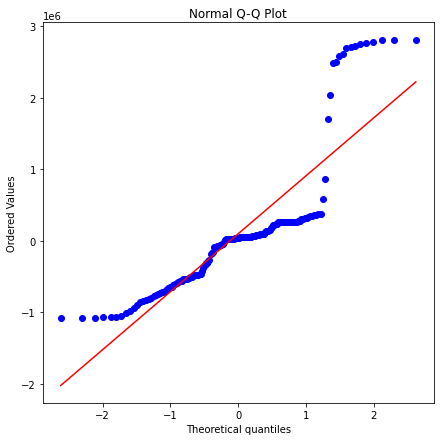

In [ ]:
reg = LinearRegression()

reg.fit(np.array(xTrain[["tests"]], dtype = np.float64).reshape(-1, 1), yTrain)

predTest = reg.predict(np.array(xTest["tests"]).reshape(-1,1))

residuals = yTest - predTest
residuals = np.array(residuals).reshape((157, ))

plt.figure(figsize=(7,7))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

Wykres kwantyl-kwantyl pokazuje, że rozkład rezydułów nie spełnia założeń regresji liniowej tj. rozkład normalny i homoscedastyczność.



Po sprawdzeniu rozdkładów rezyduów okazało się, że dla żadnej ze zmiennych nie zostały spełnione założenia regresji liniowej. 

## Wybranie kolumn do regresji wielowymiarowej

In [ ]:
corr = dataLocal[colsConfirmed].corr()
corr.style.background_gradient(cmap='coolwarm')

,deaths,tests,vaccines,people_vaccinated,people_fully_vaccinated,testing_policy,vaccination_policy,elderly_people_protection
deaths,1.000000,0.948600,0.813568,0.838643,0.792297,0.835557,0.904711,-0.379948
tests,0.948600,1.000000,0.933917,0.933590,0.909357,0.842255,0.956011,-0.593313
vaccines,0.813568,0.933917,1.000000,0.991004,0.993165,0.834493,0.942150,-0.651682
people_vaccinated,0.838643,0.933590,0.991004,1.000000,0.989437,0.833346,0.960707,-0.563814
people_fully_vaccinated,0.792297,0.909357,0.993165,0.989437,1.000000,0.843974,0.941593,-0.595952
testing_policy,0.835557,0.842255,0.834493,0.833346,0.843974,1.000000,0.839280,-0.420017
vaccination_policy,0.904711,0.956011,0.942150,0.960707,0.941593,0.839280,1.000000,-0.486536
elderly_people_protection,-0.379948,-0.593313,-0.651682,-0.563814,-0.595952,-0.420017,-0.486536,1.000000


Prawie wszytskie zmienne są ze sobą skorelowane na pozimie współczynnika korelacji < 0.8. Jedyną zmienną odstającą od tego wzorca jest zmienna elderly_people_protection. Dlatego do modelu regresji wielorakiej wybieram właśnie ją oraz oczywiście zmienną tests, gdyż dała ona najlepsze wyniki w przypadku regresji liniowej.

## Model regresji wielorakiej

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(dataLocal[["tests", "elderly_people_protection"]], dataLocal[["confirmed"]], 
                                            test_size=0.2, random_state=0)

Należy sprawdzić czy i jak wybrane zmienne różnią się magnitudą i dokonać ewentualnego skalowania:

In [ ]:
print(min(xTrain['tests']), max(xTrain['tests']))
print(min(xTrain['elderly_people_protection']), max(xTrain['elderly_people_protection']))

0.0 87336414.0
-3.0 1.0


In [ ]:
scaler = StandardScaler()

xTrainScaled = scaler.fit_transform(xTrain)
xTestScaled = scaler.transform(xTest)

In [ ]:
mreg = LinearRegression()

mreg.fit(xTrainScaled, yTrain)

predTrain = mreg.predict(xTrainScaled)
predTest = mreg.predict(xTestScaled)

In [ ]:
r2Train = r2_score(yTrain, predTrain)
r2Test = r2_score(yTest, predTest)
rmseTrain = np.sqrt(mean_squared_error(yTrain, predTrain))
rmseTest = np.sqrt(mean_squared_error(yTest, predTest))

resConfirmedLocal.loc["test + elderly_people_protection", :] =  [r2Train, r2Test, rmseTrain, rmseTest]

In [ ]:
resConfirmedLocal

,R2 train,R2 test,RMSE train,RMSE test
deaths,0.771249,0.738358,1331701.7501,1617705.60418
tests,0.929226,0.91575,740733.859241,917973.064095
vaccines,0.809745,0.807282,1214487.823116,1388372.773109
people_vaccinated,0.764928,0.746833,1349977.367273,1591287.84356
people_fully_vaccinated,0.737091,0.725213,1427671.616849,1657842.526593
testing_policy,0.608188,0.598277,1742866.978632,2004512.86413
vaccination_policy,0.777711,0.746792,1312756.800568,1591418.009658
elderly_people_protection,0.463156,0.514567,2040092.195435,2203485.409951
test + elderly_people_protection,0.949995,0.943164,622633.320872,753978.104767


Model wielowymiarowy jest lepszy niż modele regresji liniowej. Ma lepsze wartości metryki r2. Jeżeli chodzi o metrykę RMSE to ponownie widoczna jest różnica dla zbiorów. Jest mniejsza niż dla modeli regresji liniowej, dlatego mimo, iż model wielowymiarowy nie jest idealny to jakością na pewno przewyższa model liniowy.

## SVR

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(dataLocal[["date", "tests", "elderly_people_protection"]], dataLocal[["confirmed"]], 
                                            test_size=0.2, random_state=0)

In [ ]:
scaler = StandardScaler()

xTrainScaled = scaler.fit_transform(xTrain[["tests", "elderly_people_protection"]])
xTestScaled = scaler.transform(xTest[["tests", "elderly_people_protection"]])

In [ ]:
svr = SVR()

svr.fit(xTrainScaled, yTrain)

predTrain = svr.predict(xTrainScaled)
predTest = svr.predict(xTestScaled)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


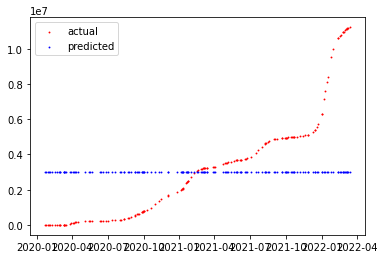

In [ ]:
plt.scatter( xTest[['date']], yTest, s=0.75, c='r', marker="o", label = "actual")
plt.scatter( xTest[['date']], predTest, s=0.75, c='b', marker="o", label = "predicted")
plt.legend()
plt.show()

In [ ]:
print(r2_score(yTrain, predTrain))
print(r2_score(yTest, predTest))
print(np.sqrt(mean_squared_error(yTrain, predTrain)))
print(np.sqrt(mean_squared_error(yTest, predTest)))

-0.0004200758558410289
-0.01262318041343402
2784946.2761609866
3182507.47465825


## Drzewa regresyjne

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(dataLocal[["date", "tests", "elderly_people_protection"]], dataLocal[["confirmed"]], 
                                            test_size=0.2, random_state=0)

In [ ]:
regTree = DecisionTreeRegressor()

regTree.fit(xTrain[["tests", "elderly_people_protection"]], yTrain)

predTrain = regTree.predict(xTrain[["tests", "elderly_people_protection"]])
predTest = regTree.predict(xTest[["tests", "elderly_people_protection"]])

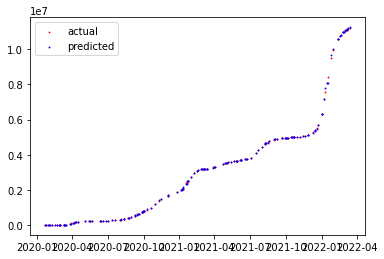

In [ ]:
plt.scatter( xTest[['date']], yTest, s=0.75, c='r', marker="o", label = "actual")
plt.scatter( xTest[['date']], predTest, s=0.75, c='b', marker="o", label = "predicted")
plt.legend()
plt.show()

In [ ]:
print(r2_score(yTrain, predTrain))
print(r2_score(yTest, predTest))
print(np.sqrt(mean_squared_error(yTrain, predTrain)))
print(np.sqrt(mean_squared_error(yTest, predTest)))

0.9999999943278278
0.9998718079582554
209.70091433838752
35807.66751357851


## Las losowy

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(dataLocal[["date", "tests", "elderly_people_protection"]], dataLocal[["confirmed"]], 
                                            test_size=0.2, random_state=0)

In [ ]:
RF = RandomForestClassifier()

RF.fit(xTrain[["tests", "elderly_people_protection"]], np.array(yTrain).ravel())

predTrain = RF.predict(xTrain[["tests", "elderly_people_protection"]])
predTest = RF.predict(xTest[["tests", "elderly_people_protection"]])

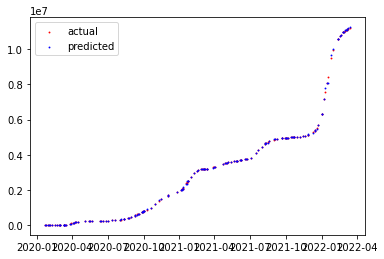

In [ ]:
plt.scatter( xTest[['date']], yTest, s=0.75, c='r', marker="o", label = "actual")
plt.scatter( xTest[['date']], predTest, s=0.75, c='b', marker="o", label = "predicted")
plt.legend()
plt.show()

In [ ]:
print(r2_score(yTrain, predTrain))
print(r2_score(yTest, predTest))
print(np.sqrt(mean_squared_error(yTrain, predTrain)))
print(np.sqrt(mean_squared_error(yTest, predTest)))

0.9999999939312361
0.9998714704854494
216.90808657661555
35854.76939012589


## Podsumowanie

W omawianym przypadku algorytm SVR nie sprawdził się. Wyniki nie są nawet zbliżone do rzeczywistych, predykcja nie oddaje żaden sposób trendu danych.
<br>
Dla algorytmów drzew regresyjnych i lasu losowego metryka r2 daje wysoki wynik zarówno dla zbioru treningowego jak i testowego co mówi o wysokiej jakości predykcji. Zauważalny jest problem z różnicą w RMSE- jest ona na tyle duża, że sugeruje overfitting.
<br>

## b) deaths

In [ ]:
colsDeaths = ['confirmed',
 'tests',
 'vaccines',
 'people_vaccinated',
 'people_fully_vaccinated',
 'testing_policy',
 'facial_coverings',
 'vaccination_policy',
 ]

## Modele regresji liniowej


In [ ]:
resDeathsLocal = pd.DataFrame(index=[colsDeaths], columns = ['R2 train', 'R2 test', 'RMSE train', 'RMSE test'])  

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(dataLocal[colsDeaths], dataLocal[["deaths"]], 
                                            test_size=0.2, random_state=0)

In [ ]:
for idx, col in enumerate(colsDeaths):
  reg = LinearRegression()

  reg.fit(np.array(xTrain[[col]], dtype = np.float64).reshape(-1, 1), yTrain)

  predTrain = reg.predict(np.array(xTrain[col]).reshape(-1,1))
  predTest = reg.predict(np.array(xTest[col]).reshape(-1,1))

  r2Train = reg.score(xTrain[[col]], yTrain)
  r2Test = reg.score(xTest[[col]], yTest)
  rmseTrain = np.sqrt(mean_squared_error(yTrain, predTrain))
  rmseTest = np.sqrt(mean_squared_error(yTest, predTest))

  resDeathsLocal.iloc[idx, :] = [r2Train, r2Test, rmseTrain, rmseTest]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegr

In [ ]:
resDeathsLocal

,R2 train,R2 test,RMSE train,RMSE test
confirmed,0.771249,0.738125,14372.605519,16487.468008
tests,0.901396,0.893582,9436.273614,10510.31132
vaccines,0.66176,0.661324,17476.985361,18749.920008
people_vaccinated,0.703861,0.700496,16353.156686,17632.29097
people_fully_vaccinated,0.627238,0.628403,18347.21809,19640.089571
testing_policy,0.687738,0.733239,16792.426362,16640.588627
facial_coverings,0.219176,0.264023,26554.054509,27640.086016
vaccination_policy,0.816109,0.825154,12886.484394,13472.101623


Ponowanie zauważamy, że model dla zm. tests jest najlepszy. Ponownie zauważamy różnicę w RMSE, jest ona jednak mniejsza niż w poprzednim przypadku.

Text(0.5, 1.0, 'Normal Q-Q Plot')

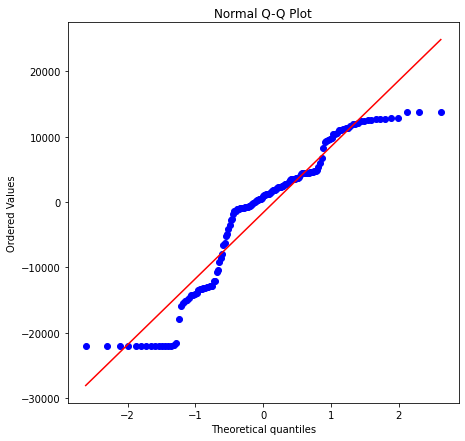

In [ ]:
reg = LinearRegression()

reg.fit(np.array(xTrain[["tests"]], dtype = np.float64).reshape(-1, 1), yTrain)

predTest = reg.predict(np.array(xTest["tests"]).reshape(-1,1))

residuals = yTest - predTest
residuals = np.array(residuals).reshape((157, ))

plt.figure(figsize=(7,7))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

Wykres kwantyl-kwantyl pokazuje nam, że rozkład rezydułów ponownie nie spełnia założeń dla regresji liniowej tj. rozkład normalny i homoscedastyczność.

Po sprawdzeniu rozdkładów rezyduów okazało się, że dla żadnej ze zmiennych nie zostały spełnione założenia regresji liniowej. 

## Wybranie kolumn do regresji wielowymiarowej

In [ ]:
corr = dataLocal[colsDeaths].corr()
corr.style.background_gradient(cmap='coolwarm')

,confirmed,tests,vaccines,people_vaccinated,people_fully_vaccinated,testing_policy,facial_coverings,vaccination_policy
confirmed,1.000000,0.962518,0.900050,0.872784,0.857593,0.779493,0.239776,0.878311
tests,0.962518,1.000000,0.933920,0.933585,0.909355,0.842247,0.298389,0.955999
vaccines,0.900050,0.933920,1.000000,0.991004,0.993165,0.834493,0.046877,0.942150
people_vaccinated,0.872784,0.933585,0.991004,1.000000,0.989437,0.833346,0.055223,0.960707
people_fully_vaccinated,0.857593,0.909355,0.993165,0.989437,1.000000,0.843974,0.020944,0.941593
testing_policy,0.779493,0.842247,0.834493,0.833346,0.843974,1.000000,0.412298,0.839280
facial_coverings,0.239776,0.298389,0.046877,0.055223,0.020944,0.412298,1.000000,0.162526
vaccination_policy,0.878311,0.955999,0.942150,0.960707,0.941593,0.839280,0.162526,1.000000


W przypadku drugim zauważamy ten sam problem jak poprzednio. Z tych samych powodów do modelu regresji wielorakiej wybieram zmienne: test i facial_coverings.


## Model regresji wielorakiej



In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(dataLocal[["tests", "facial_coverings"]], dataLocal[["deaths"]], 
                                            test_size=0.2, random_state=0)

Należy sprawdzić czy i jak wybrane zmienne różnią się magnitudą i dokonać ewentualnego skalowania:

In [ ]:
print(min(xTrain['tests']), max(xTrain['tests']))
print(min(xTrain['facial_coverings']), max(xTrain['facial_coverings']))

0.0 87336414.0
0.0 4.0


In [ ]:
scaler = StandardScaler()

xTrainScaled = scaler.fit_transform(xTrain)
xTestScaled = scaler.transform(xTest)

In [ ]:
mreg = LinearRegression()

mreg.fit(xTrainScaled, yTrain)

predTrain = mreg.predict(xTrainScaled)
predTest = mreg.predict(xTestScaled)

In [ ]:
r2Train = r2_score(yTrain, predTrain)
r2Test = r2_score(yTest, predTest)
rmseTrain = np.sqrt(mean_squared_error(yTrain, predTrain))
rmseTest = np.sqrt(mean_squared_error(yTest, predTest))

resDeathsLocal.loc["test + facial_coverings", :] =  [r2Train, r2Test, rmseTrain, rmseTest]

In [ ]:
resDeathsLocal

,R2 train,R2 test,RMSE train,RMSE test
confirmed,0.771249,0.738125,14372.605519,16487.468008
tests,0.901396,0.893582,9436.273614,10510.31132
vaccines,0.66176,0.661324,17476.985361,18749.920008
people_vaccinated,0.703861,0.700496,16353.156686,17632.29097
people_fully_vaccinated,0.627238,0.628403,18347.21809,19640.089571
testing_policy,0.687738,0.733239,16792.426362,16640.588627
facial_coverings,0.219176,0.264023,26554.054509,27640.086016
vaccination_policy,0.816109,0.825154,12886.484394,13472.101623
test + facial_coverings,0.938958,0.952804,7424.499899,6999.369723


Ponownie model wielowymiarowy okazał się lepszy. Tym razem dla zbioru testowego przewiduje on nawet lepiej niż dla treningowego. Róznica w RMSE jest niższa niż dla modelu liniowego, sama wartość metryki również jest niższa. 

## SVR

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(dataLocal[["date", "tests", "facial_coverings"]], dataLocal[["deaths"]], 
                                            test_size=0.2, random_state=0)

In [ ]:
scaler = StandardScaler()

xTrainScaled = scaler.fit_transform(xTrain[["tests", "facial_coverings"]])
xTestScaled = scaler.transform(xTest[["tests", "facial_coverings"]])

In [ ]:
svr = SVR()

svr.fit(xTrainScaled, yTrain)

predTrain = svr.predict(xTrainScaled)
predTest = svr.predict(xTestScaled)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


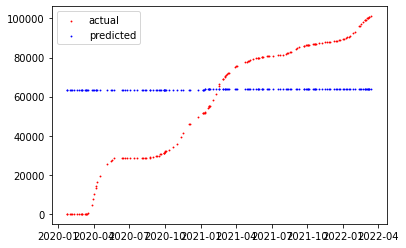

In [ ]:
plt.scatter( xTest[['date']], yTest, s=0.75, c='r', marker="o", label = "actual")
plt.scatter( xTest[['date']], predTest, s=0.75, c='b', marker="o", label = "predicted")
plt.legend()
plt.show()

In [ ]:
print(r2_score(yTrain, predTrain))
print(r2_score(yTest, predTest))
print(np.sqrt(mean_squared_error(yTrain, predTrain)))
print(np.sqrt(mean_squared_error(yTest, predTest)))

-0.05276627646469345
-0.02342406368027894
30833.309345461297
32593.807539390134


## Drzewa regresyjne

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(dataLocal[["date", "tests", "facial_coverings"]], dataLocal[["deaths"]], 
                                            test_size=0.2, random_state=0)

In [ ]:
regTree = DecisionTreeRegressor()

regTree.fit(xTrain[["tests", "facial_coverings"]], yTrain)

predTrain = regTree.predict(xTrain[["tests", "facial_coverings"]])
predTest = regTree.predict(xTest[["tests", "facial_coverings"]])

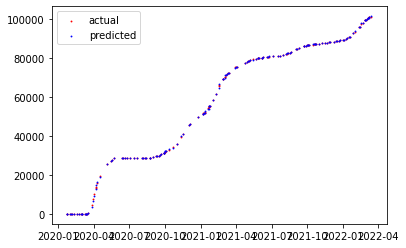

In [ ]:
plt.scatter( xTest[['date']], yTest, s=0.75, c='r', marker="o", label = "actual")
plt.scatter( xTest[['date']], predTest, s=0.75, c='b', marker="o", label = "predicted")
plt.legend()
plt.show()

In [ ]:
print(r2_score(yTrain, predTrain))
print(r2_score(yTest, predTest))
print(np.sqrt(mean_squared_error(yTrain, predTrain)))
print(np.sqrt(mean_squared_error(yTest, predTest)))

0.9999999684588096
0.9999460219366121
5.336950789892694
236.70963411732203


## Las losowy

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(dataLocal[["date", "tests", "facial_coverings"]], dataLocal[["deaths"]], 
                                            test_size=0.2, random_state=0)

In [ ]:
RF = RandomForestClassifier()

RF.fit(xTrain[["tests", "facial_coverings"]], np.array(yTrain).ravel())

predTrain = RF.predict(xTrain[["tests", "facial_coverings"]])
predTest = RF.predict(xTest[["tests", "facial_coverings"]])

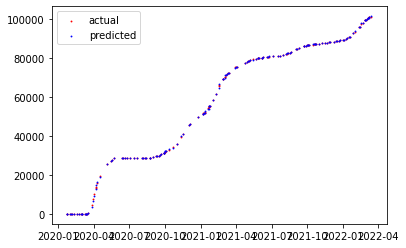

In [ ]:
plt.scatter( xTest[['date']], yTest, s=0.75, c='r', marker="o", label = "actual")
plt.scatter( xTest[['date']], predTest, s=0.75, c='b', marker="o", label = "predicted")
plt.legend()
plt.show()

In [ ]:
print(r2_score(yTrain, predTrain))
print(r2_score(yTest, predTest))
print(np.sqrt(mean_squared_error(yTrain, predTrain)))
print(np.sqrt(mean_squared_error(yTest, predTest)))

0.9999999666182634
0.9999460026743932
5.490458593431718
236.75186558900145


## Podsumwowanie

W przypadku predykcji zmiennej deaths algorytm SVR nie sprawdził się. Wyniki są tak samo złe jak dla zmiennej confirmed.
<br>
Algorytmy drzew regresyjnych i lasu losowego sprawdziły się lepiej niż dla zmiennej confirmed. Wartość metryki r2 jest równie wysoka, natomiast RMSE nie dość, że ma znacznie niższe wartości to dodatkowo różnica tej metryki dla zbioru treningowego i testowego również jest mniejsza. 
<br>
Jako najlepszy wybrałabym alg. drzew regresyjnych, ponieważ jest mniej skomplikowany niż las losowy a daje podobne wyniki. 

## Dane globalne

In [ ]:
labelsGlobal = []
for col in dataWorld:
    labelsGlobal.append(len(dataWorld[col].unique()))

pd.DataFrame({
    'Variable' : dataWorld.columns,
    'Labels local': labelsGlobal
})

,Variable,Labels local
0,id,236
1,date,866
2,confirmed,92090
3,deaths,30817
4,recovered,48114
5,tests,76696
6,vaccines,46865
7,people_vaccinated,44050
8,people_fully_vaccinated,41097
9,school_closing,8


In [ ]:
pd.DataFrame({
    'Global': lackOfData(dataWorld),
})

,Global
id,0.000000
date,0.000000
confirmed,8.650786
deaths,17.079434
recovered,63.041560
tests,58.806230
vaccines,74.530779
people_vaccinated,75.770132
people_fully_vaccinated,77.007909
school_closing,19.887408


Po przeanalizowaniu braków występujących w danych globalnych zauważam, że większość z nich jest na poziomie ok. 20%- nie powinno stanowić problemu sensowne zastąpienie faktycznymi wartościami. 
<br><br>
Większe braki zauważamy m.in. dla zmiennych informujących o szczepieniach, aczkolwiek świadomość faktu, iż brak danych wynika z tego, że szczepienia nie istniały. Prawdopodbnie zastąpienie pierwszych braków zerami rozwiąże problem.
<br><br>
Dla zmiennej recovered braki są na poziomie ok 63%. Ze względu na to, że jest to zmienna, która informuje raczej o skutkach oraz na braki danych uważam, że najbardziej słusznym będzie usunięcie tej konkretnej kolumny.
<br><br>
Najbardziej problematyczne wydają się być braki w kolumnie test, ponieważ sięgają one ok.59%. Praca z danymi lokalnymi pokazała, że jest to zmienna kluczowa dla predykcji, dlatego uważam, że należy tak dobrać państwa do modeli globalnych aby zminimalizować braki danych w zmiennej tests. Dlatego też decyduję się na usunięcie danych z krajów, dla których braki dla tej konkretnej zmiennej wynoszą > 50%.

In [ ]:
dataWorld = dataWorld.drop(columns = 'recovered')

In [ ]:
lackOfTestData = dataWorld[['tests']].isna().groupby(dataWorld['id']).mean()

ids = list(lackOfTestData[lackOfTestData < 0.5].dropna().index)

In [ ]:
dataWorld = dataWorld[dataWorld['id'].isin(ids)]

In [ ]:
pd.DataFrame({
    'Global': lackOfData(dataWorld),
})

,Global
id,0.000000
date,0.000000
confirmed,4.309401
deaths,6.901868
tests,15.480659
vaccines,61.257752
people_vaccinated,62.456900
people_fully_vaccinated,64.198548
school_closing,8.736482
workplace_closing,8.777669


Zauważamy, że dokonanie wcześniej opisanych operacji znacznie zredukowało braki danych.   
<br>
Zredukowana została również liczba państw branych pod uwagę- z 236 na 102.

In [ ]:
countries = [y for x, y in dataWorld.groupby('id', as_index=False)]

Czyszczenie zbioru danych rozpocznę od operacji analogicznych dla zbioru z danymi lokalnymi:
1. Usnunięcie anomalii dla kolumn kumulatywnych tzn. kiedy wartość następna jest mniejsza niż poprzednia
2. Zastąpienie pierwszych braków zerami zgodnie z założeniem, że wynikają one z faktu, że pewnych danych mogło do pewnego momentu po prprostu sotu nie być.

In [ ]:
#1
cumulativeCols = ['confirmed', 'deaths', 'tests', 'vaccines', 'people_vaccinated', 'people_fully_vaccinated']

for country in countries: 
  for col in cumulativeCols:
      tmp = np.array(country[col])
      for i in range(1, country.shape[0]):
          if tmp[i] < tmp[i-1]:
              tmp[i] = tmp[i-1]
      country[col] = tmp

In [ ]:
#2
for country in countries:
  country[cumulativeCols] = country[cumulativeCols].interpolate('zero', fill_value=0, limit_direction='backward')

Sprawdźmy jak powyższe operacje wpłynęły na zbiór danych: 

In [ ]:
dataWorld = pd.concat(countries)

Sprawdzenie czy istnieją państwa, dla których braki danych "szczepionkowych" wynoszą 100% i ewentualne usunięcie ich ze zbioru.

In [ ]:
idxs = []
for idx, country in enumerate(countries):
  if lackOfData(country["vaccines"]) == 100:
    idxs.append(idx)

for i in idxs[::-1]: 
  countries.pop(i)

In [ ]:
pd.DataFrame({
    'Global': lackOfData(dataWorld[cumulativeCols]),
})

,Global
confirmed,0.101204
deaths,0.089436
tests,1.948763
vaccines,2.665427
people_vaccinated,2.667781
people_fully_vaccinated,2.671311


Braki w kolumnach kumulatywnych wciąż występują ale ich ilość znacznie się zredukowała. Do tak małych braków postanawiam zastosować interpolację liniową.

In [ ]:
for country in countries:
  country[cumulativeCols] = country[cumulativeCols].interpolate('linear')

In [ ]:
dataWorld = pd.concat(countries)

In [ ]:
pd.DataFrame({
    'Global': lackOfData(dataWorld[cumulativeCols]),
})

,Global
confirmed,0.0
deaths,0.0
tests,0.0
vaccines,0.0
people_vaccinated,0.0
people_fully_vaccinated,0.0


Interpolacja pozwoliła w pełni pozbyć się braków z kolumn skumulowanych.
<br>
Pozostałe braki to te w kolumnach dotyczących restrykcji rządowych, każdy na poziomie ok. 9%

In [ ]:
categoricalCols = ["school_closing", "workplace_closing", "cancel_events", "gatherings_restrictions",
                  "transport_closing", "stay_home_restrictions", "internal_movement_restrictions",
                  "international_movement_restrictions", "information_campaigns", "testing_policy",
                  "contact_tracing", "facial_coverings", "vaccination_policy", "elderly_people_protection",
                  "government_response_index", "stringency_index", "containment_health_index"]

In [ ]:
pd.DataFrame({
    'Global': lackOfData(dataWorld[categoricalCols]),
})

,Global
school_closing,8.877429
workplace_closing,8.919405
cancel_events,8.921804
gatherings_restrictions,8.929000
transport_closing,8.931398
stay_home_restrictions,8.938594
internal_movement_restrictions,8.913408
international_movement_restrictions,8.883425
information_campaigns,8.934996
testing_policy,8.903814


Braków postanawiam pozbyć się poprzez wyliczenie średniej grupując po dacie, zaokrąglając ją do najbliższej liczby całkowitej. Ewentualne braki wypełniam wartością poprzednią (metoda ffill)

In [ ]:
categoricalColsCumulated = dataWorld[categoricalCols].groupby(dataWorld['date']).mean().round(0)

In [ ]:
categoricalColsCumulated = categoricalColsCumulated.ffill()

In [ ]:
pd.DataFrame({
    'Global': lackOfData(categoricalColsCumulated),
})

,Global
school_closing,0.0
workplace_closing,0.0
cancel_events,0.0
gatherings_restrictions,0.0
transport_closing,0.0
stay_home_restrictions,0.0
internal_movement_restrictions,0.0
international_movement_restrictions,0.0
information_campaigns,0.0
testing_policy,0.0


Braki danych zostały odpowiednio potraktowane, już nie wysępują w zbiorze.
<br>
Ostatnim krokiem będzie przygotowanie dataframe'a zawierającego dane pogrupowane względem dat. 
<br> 
Dla kolumn kumulatywnych będzie to suma a dla kategorycznych policzona kilka komórek wyżej średnia.

In [ ]:
cumulativeColsCumulated = dataWorld[cumulativeCols].groupby(dataWorld['date']).sum()

In [ ]:
cumulativeColsCumulated.shape

(866, 6)

In [ ]:
dataWorld = pd.merge(left=cumulativeColsCumulated, right=categoricalColsCumulated, left_on='date', right_on='date')

In [ ]:
pd.DataFrame({
    'Global': lackOfData(dataWorld),
})

,Global
confirmed,0.0
deaths,0.0
tests,0.0
vaccines,0.0
people_vaccinated,0.0
people_fully_vaccinated,0.0
school_closing,0.0
workplace_closing,0.0
cancel_events,0.0
gatherings_restrictions,0.0


In [ ]:
dataWorld = dataWorld.reset_index()

Dane udało się doprowadzić do stanu w którym są pogrupowane po datach a braki w ogóle nie występują. Tak przygotowane obserwacje posłużą do stworzenia modeli predykcji globalnej.

## Wybór kolumn do regresji liniowych

In [ ]:
corr = dataWorld.corr()
corr.style.background_gradient(cmap='coolwarm')

,confirmed,deaths,tests,vaccines,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,facial_coverings,vaccination_policy,elderly_people_protection,government_response_index,stringency_index,containment_health_index
confirmed,1.000000,0.948025,0.990220,0.959435,0.952496,0.951834,-0.516968,0.131966,-0.071778,-0.240057,-0.274772,-0.344904,-0.270239,-0.269764,0.295085,0.702412,-0.329544,0.513986,0.911247,0.040716,0.079558,-0.215080,0.117967
deaths,0.948025,1.000000,0.975383,0.894399,0.924997,0.879110,-0.504410,0.058722,-0.030678,-0.187588,-0.327140,-0.406019,-0.324169,-0.224206,0.369028,0.787139,-0.287336,0.617955,0.972990,0.066754,0.209477,-0.110587,0.248298
tests,0.990220,0.975383,1.000000,0.964850,0.971917,0.956167,-0.513775,0.124769,-0.060684,-0.241618,-0.285603,-0.358070,-0.280823,-0.278802,0.305033,0.739441,-0.348447,0.538733,0.946444,0.042469,0.105221,-0.196831,0.145445
vaccines,0.959435,0.894399,0.964850,1.000000,0.991930,0.999125,-0.474427,0.204687,-0.071583,-0.318657,-0.203040,-0.256408,-0.199135,-0.337966,0.214108,0.674262,-0.440260,0.393568,0.880461,0.025159,-0.014055,-0.276541,0.026417
people_vaccinated,0.952496,0.924997,0.971917,0.991930,1.000000,0.987347,-0.477357,0.176816,-0.061411,-0.316856,-0.216667,-0.273618,-0.212501,-0.340943,0.228479,0.708721,-0.458834,0.412565,0.919975,0.027660,0.017000,-0.255608,0.059030
people_fully_vaccinated,0.951834,0.879110,0.956167,0.999125,0.987347,1.000000,-0.468548,0.219373,-0.072292,-0.320623,-0.196095,-0.247638,-0.192324,-0.338020,0.206785,0.663183,-0.435386,0.384032,0.863031,0.024337,-0.023938,-0.280831,0.015944
school_closing,-0.516968,-0.504410,-0.513775,-0.474427,-0.477357,-0.468548,1.000000,0.422063,0.682458,0.662384,0.618784,0.711912,0.639437,0.643272,0.292476,-0.105290,0.307387,-0.190188,-0.495201,0.601433,0.467898,0.695802,0.456880
workplace_closing,0.131966,0.058722,0.124769,0.204687,0.176816,0.219373,0.422063,1.000000,0.533305,0.400767,0.471109,0.467451,0.490887,0.346055,0.340353,0.271701,0.004056,0.040268,0.024877,0.497378,0.346214,0.404666,0.359626
cancel_events,-0.071778,-0.030678,-0.060684,-0.071583,-0.061411,-0.072292,0.682458,0.533305,1.000000,0.770197,0.628750,0.648806,0.616660,0.740894,0.640449,0.361168,0.261094,0.175218,-0.050682,0.839150,0.773672,0.862368,0.779948
gatherings_restrictions,-0.240057,-0.187588,-0.241618,-0.318657,-0.316856,-0.320623,0.662384,0.400767,0.770197,1.000000,0.528177,0.535848,0.529672,0.756339,0.509800,0.120672,0.410066,0.175063,-0.210474,0.682795,0.712760,0.831718,0.712379


Na podstawie macierzy korelacji wybieram do regresji liniowej kolumny, których korelacja ze zmiennymi, które bedę chciała przewidywać jest odpowiednio wysoka.


Dla zmiennej confirmed będą to:
1. deaths
2. tests	
3. vaccines
4. people_vaccinated
5. people_fully_vaccinated
6. school_closing
7. testing_policy
8. facial_coverings
9. vaccination_policy

Natomiast dla zmiennej deaths wybieram kolumny: 
1. confirmed
2. tests	
3. vaccines
4. people_vaccinated
5. people_fully_vaccinated
6. school_closing
7. testing_policy
8. facial_coverings
9. vaccination_policy

Zauważamy, że lista kolumn cie pokrywa. 

## Utworzenie modeli na podstawie danych globalnych dla zmiennych:
## a) confirmed

In [ ]:
colsConfirmed = ['deaths',
 'tests',
 'vaccines',
 'people_vaccinated',
 'people_fully_vaccinated',
 'school_closing',
 'testing_policy',
 'facial_coverings',
 'vaccination_policy',
 ]

## Modele regresji liniowej:


In [ ]:
resConfirmedGlobal = pd.DataFrame(index=[colsConfirmed], columns = ['R2 train', 'R2 test', 'RMSE train', 'RMSE test'])  

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(dataWorld[colsConfirmed], dataWorld[["confirmed"]], 
                                            test_size=0.2, random_state=0)

In [ ]:
for idx, col in enumerate(colsConfirmed):
  reg = LinearRegression()

  reg.fit(np.array(xTrain[[col]], dtype = np.float64).reshape(-1, 1), yTrain)

  predTrain = reg.predict(np.array(xTrain[col]).reshape(-1,1))
  predTest = reg.predict(np.array(xTest[col]).reshape(-1,1))

  r2Train = reg.score(xTrain[[col]], yTrain)
  r2Test = reg.score(xTest[[col]], yTest)
  rmseTrain = np.sqrt(mean_squared_error(yTrain, predTrain))
  rmseTest = np.sqrt(mean_squared_error(yTest, predTest))

  resConfirmedGlobal.iloc[idx, :] = [r2Train, r2Test, rmseTrain, rmseTest]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegr

In [ ]:
resConfirmedGlobal

,R2 train,R2 test,RMSE train,RMSE test
deaths,0.898169,0.900272,41085771.162541,36691129.819086
tests,0.980496,0.980489,17980999.225995,16229180.947487
vaccines,0.923474,0.905267,35616984.776114,35760616.513025
people_vaccinated,0.909734,0.894014,38682295.307768,37824964.437517
people_fully_vaccinated,0.909489,0.88799,38734789.341432,38884951.122549
school_closing,0.268135,0.25698,110145520.958579,100150645.385863
testing_policy,0.496708,0.472363,91340021.57838,84395806.799248
facial_coverings,0.27073,0.224736,109950053.821791,102300591.069315
vaccination_policy,0.829809,0.830696,53115345.864676,47806469.273052


Tak jak w przypadku danych lokalnych najlepszym modelem jest ten, który wykorzystuje zmienną tests. R2 jest wysokie. Wartości metryki RMSE również są niepokojące wysokie ale przynajmniej nie wskazują na wystąpienie zjawiska overfittingu.

Text(0.5, 1.0, 'Normal Q-Q Plot')

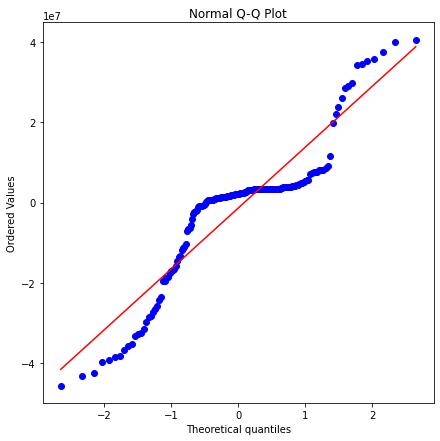

In [ ]:
reg = LinearRegression()

reg.fit(np.array(xTrain[["tests"]], dtype = np.float64).reshape(-1, 1), yTrain)

predTest = reg.predict(np.array(xTest["tests"]).reshape(-1,1))

residuals = yTest - predTest
residuals = np.array(residuals).reshape((174 , ))

plt.figure(figsize=(7,7))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

Wykres kwantyl-kwantyl pokazuje, że rozkład rezydułów nie spełnia założeń regresji liniowej tj. rozkład normalny i homoscedastyczność.

Sprawdziłam rozkład rezyduów dla wszytskich wybranych zmiennych i zauważyłam, że żaden nie spełnia założeń regresji liniowej. Myślę, że problem wynika po prostu z charakteru danych covidowych.

## Wybranie kolumn do regresji wielowymiarowej




In [ ]:
corr = dataLocal[colsConfirmed].corr()
corr.style.background_gradient(cmap='coolwarm')

,deaths,tests,vaccines,people_vaccinated,people_fully_vaccinated,school_closing,testing_policy,facial_coverings,vaccination_policy
deaths,1.000000,0.948587,0.813568,0.838643,0.792297,-0.021464,0.835557,0.479814,0.904711
tests,0.948587,1.000000,0.933920,0.933585,0.909355,-0.076423,0.842247,0.298389,0.955999
vaccines,0.813568,0.933920,1.000000,0.991004,0.993165,-0.043339,0.834493,0.046877,0.942150
people_vaccinated,0.838643,0.933585,0.991004,1.000000,0.989437,-0.045755,0.833346,0.055223,0.960707
people_fully_vaccinated,0.792297,0.909355,0.993165,0.989437,1.000000,-0.042178,0.843974,0.020944,0.941593
school_closing,-0.021464,-0.076423,-0.043339,-0.045755,-0.042178,1.000000,-0.058578,-0.080804,-0.032516
testing_policy,0.835557,0.842247,0.834493,0.833346,0.843974,-0.058578,1.000000,0.412298,0.839280
facial_coverings,0.479814,0.298389,0.046877,0.055223,0.020944,-0.080804,0.412298,1.000000,0.162526
vaccination_policy,0.904711,0.955999,0.942150,0.960707,0.941593,-0.032516,0.839280,0.162526,1.000000


Dążymy do tego żeby zmienne objaśniające były jak najmniej skorelowane między sobą i jak najbardziej skorelowane ze zmienną objaśnianą
<br><br>
Na tej podstawie do regresji wielowymiarowej wybieram kolumny:
1. tests- model jednowymiarowy był najlepszy
2. school_closing
3. facial_coverings

## Model regresji wielorakiej 

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(dataLocal[["tests", "school_closing", "facial_coverings"]], dataLocal[["confirmed"]], 
                                            test_size=0.2, random_state=0)

Należy sprawdzić czy i jak wybrane zmienne różnią się magnitudą i dokonać ewentualnego skalowania:

In [ ]:
print(min(xTrain['tests']), max(xTrain['tests']))
print(min(xTrain['school_closing']), max(xTrain['school_closing']))
print(min(xTrain['facial_coverings']), max(xTrain['facial_coverings']))

0.0 87336414.0
-3.0 3.0
0.0 4.0


In [ ]:
scaler = StandardScaler()

xTrainScaled = scaler.fit_transform(xTrain)
xTestScaled = scaler.transform(xTest)

In [ ]:
mreg = LinearRegression()

mreg.fit(xTrainScaled, yTrain)

predTrain = mreg.predict(xTrainScaled)
predTest = mreg.predict(xTestScaled)

In [ ]:
r2Train = r2_score(yTrain, predTrain)
r2Test = r2_score(yTest, predTest)
rmseTrain = np.sqrt(mean_squared_error(yTrain, predTrain))
rmseTest = np.sqrt(mean_squared_error(yTest, predTest))

resConfirmedGlobal.loc["regresja wielowymiarowa", :] =  [r2Train, r2Test, rmseTrain, rmseTest]

In [ ]:
resConfirmedGlobal

,R2 train,R2 test,RMSE train,RMSE test
deaths,0.898169,0.900272,41085771.162541,36691129.819086
tests,0.980496,0.980489,17980999.225995,16229180.947487
vaccines,0.923474,0.905267,35616984.776114,35760616.513025
people_vaccinated,0.909734,0.894014,38682295.307768,37824964.437517
people_fully_vaccinated,0.909489,0.88799,38734789.341432,38884951.122549
school_closing,0.268135,0.25698,110145520.958579,100150645.385863
testing_policy,0.496708,0.472363,91340021.57838,84395806.799248
facial_coverings,0.27073,0.224736,109950053.821791,102300591.069315
vaccination_policy,0.829809,0.830696,53115345.864676,47806469.273052
regresja wielowymiarowa,0.930742,0.920889,732759.825591,889534.860902


Wyniki osiągnięte przez model wielowymiarowy: metryka r2 > 0.9, RMSE zdecydowanie niższe aczkolwiek sugerujące wystopienie zjawiska przeuczenia. Dlatego mimo wszytsko uważam, że lepszym wyborem byłaby regresja jednowymiarowa.

## SVR

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(dataLocal[["date", "tests", "school_closing", "facial_coverings"]], dataLocal[["confirmed"]], 
                                            test_size=0.2, random_state=0)

In [ ]:
scaler = StandardScaler()

xTrainScaled = scaler.fit_transform(xTrain[["tests", "school_closing", "facial_coverings"]])
xTestScaled = scaler.transform(xTest[["tests", "school_closing", "facial_coverings"]])

In [ ]:
svr = SVR()

svr.fit(xTrainScaled, yTrain)

predTrain = svr.predict(xTrainScaled)
predTest = svr.predict(xTestScaled)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


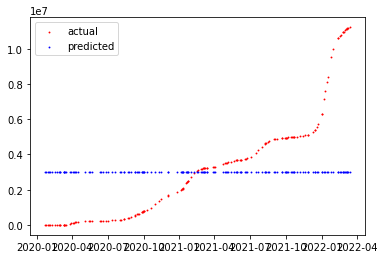

In [ ]:
plt.scatter( xTest[['date']], yTest, s=0.75, c='r', marker="o", label = "actual")
plt.scatter( xTest[['date']], predTest, s=0.75, c='b', marker="o", label = "predicted")
plt.legend()
plt.show()

In [ ]:
print(r2_score(yTrain, predTrain))
print(r2_score(yTest, predTest))
print(np.sqrt(mean_squared_error(yTrain, predTrain)))
print(np.sqrt(mean_squared_error(yTest, predTest)))

-0.00044404408531084627
-0.01264289847755995
2784979.637062682
3182538.459817487


## Drzewa regresyjne

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(dataLocal[["date", "tests", "school_closing", "facial_coverings"]], dataLocal[["confirmed"]], 
                                            test_size=0.2, random_state=0)

In [ ]:
regTree = DecisionTreeRegressor()

regTree.fit(xTrain[["tests", "school_closing", "facial_coverings"]], yTrain)

predTrain = regTree.predict(xTrain[["tests", "school_closing", "facial_coverings"]])
predTest = regTree.predict(xTest[["tests", "school_closing", "facial_coverings"]])

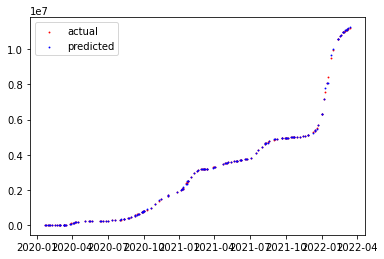

In [ ]:
plt.scatter( xTest[['date']], yTest, s=0.75, c='r', marker="o", label = "actual")
plt.scatter( xTest[['date']], predTest, s=0.75, c='b', marker="o", label = "predicted")
plt.legend()
plt.show()

In [ ]:
print(r2_score(yTrain, predTrain))
print(r2_score(yTest, predTest))
print(np.sqrt(mean_squared_error(yTrain, predTrain)))
print(np.sqrt(mean_squared_error(yTest, predTest)))

0.9999999980442256
0.9998725592456303
123.13598842859645
35702.585405515136


## Las losowy

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(dataLocal[["date", "tests", "school_closing", "facial_coverings"]], dataLocal[["confirmed"]], 
                                            test_size=0.2, random_state=0)

In [ ]:
RF = RandomForestClassifier()

RF.fit(xTrain[["tests", "school_closing", "facial_coverings"]], np.array(yTrain).ravel())

predTrain = RF.predict(xTrain[["tests", "school_closing", "facial_coverings"]])
predTest = RF.predict(xTest[["tests", "school_closing", "facial_coverings"]])

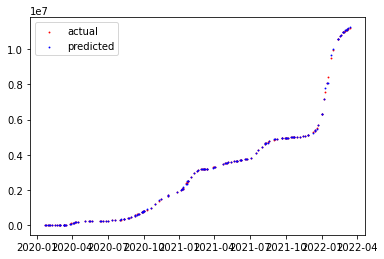

In [ ]:
plt.scatter( xTest[['date']], yTest, s=0.75, c='r', marker="o", label = "actual")
plt.scatter( xTest[['date']], predTest, s=0.75, c='b', marker="o", label = "predicted")
plt.legend()
plt.show()

In [ ]:
print(r2_score(yTrain, predTrain))
print(r2_score(yTest, predTest))
print(np.sqrt(mean_squared_error(yTrain, predTrain)))
print(np.sqrt(mean_squared_error(yTest, predTest)))

0.9999999962358722
0.9998725393458789
170.82750563833574
35705.372758921076


## Podsumowanie

Algorytm SVR ponownie nie sprawdził się dla zadanego przypadku.
<br>
Algorytmy drzew regresyjnych i lasu losowego mają wysokie wartości metryki r2 tj. > 0.99. Natomiast metryka RMSE i fakt, że jej wartość jest znacząco wyższa dla zbioru testowego sugeruje, że modele się przeuczyły i wykazują nadmierne dopasowanie do zbioru treningowego.

## b) deaths

In [ ]:
colsDeaths = ['confirmed',
 'tests',
 'vaccines',
 'people_vaccinated',
 'people_fully_vaccinated',
 'school_closing',
 'testing_policy',
 'facial_coverings',
 'vaccination_policy',
 ]

## Modele regresji liniowej


In [ ]:
resDeathsGlobal = pd.DataFrame(index=[colsDeaths], columns = ['R2 train', 'R2 test', 'RMSE train', 'RMSE test'])  

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(dataWorld[colsDeaths], dataWorld[["deaths"]], 
                                            test_size=0.2, random_state=0)

In [ ]:
for idx, col in enumerate(colsDeaths):
  reg = LinearRegression()

  reg.fit(np.array(xTrain[[col]], dtype = np.float64).reshape(-1, 1), yTrain)

  predTrain = reg.predict(np.array(xTrain[col]).reshape(-1,1))
  predTest = reg.predict(np.array(xTest[col]).reshape(-1,1))

  r2Train = reg.score(xTrain[[col]], yTrain)
  r2Test = reg.score(xTest[[col]], yTest)
  rmseTrain = np.sqrt(mean_squared_error(yTrain, predTrain))
  rmseTest = np.sqrt(mean_squared_error(yTest, predTest))

  resDeathsGlobal.iloc[idx, :] = [r2Train, r2Test, rmseTrain, rmseTest]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegr

In [ ]:
resDeathsGlobal

,R2 train,R2 test,RMSE train,RMSE test
confirmed,0.898169,0.900635,587772.833715,547649.431751
tests,0.951477,0.95061,405736.838595,386104.846013
vaccines,0.803141,0.784798,817235.617241,805952.917717
people_vaccinated,0.858797,0.840711,692135.294586,693393.356632
people_fully_vaccinated,0.776508,0.755498,870763.593959,859068.414436
school_closing,0.257939,0.237202,1586679.256216,1517368.035187
testing_policy,0.623316,0.602038,1130467.575298,1095991.719596
facial_coverings,0.391343,0.337447,1436996.528772,1414153.742655
vaccination_policy,0.946318,0.948017,426761.570801,396109.663236


Modele nie są tak dobre jak dla zmiennej confirmed (gorsze wartości metryk). Mimo to, model dla zmiennej tests daje zadowalające wyniki-> R2 na poziomie ok. 0.95 i stabilność w predykcji dla obu zbiorów. Zauważamy również, że model na podstawie zmiennej vaccination_policy również dobrze sobie radzi, jednak metryki są delikatnie gorsze niż dla modelu tests.

Text(0.5, 1.0, 'Normal Q-Q Plot')

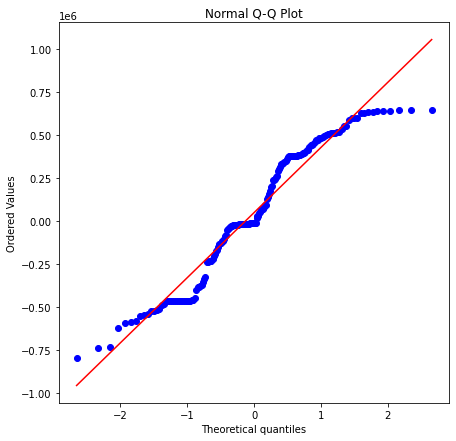

In [ ]:
reg = LinearRegression()

reg.fit(np.array(xTrain[["tests"]], dtype = np.float64).reshape(-1, 1), yTrain)

predTest = reg.predict(np.array(xTest["tests"]).reshape(-1,1))

residuals = yTest - predTest
residuals = np.array(residuals).reshape((174, ))

plt.figure(figsize=(7,7))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

Text(0.5, 1.0, 'Normal Q-Q Plot')

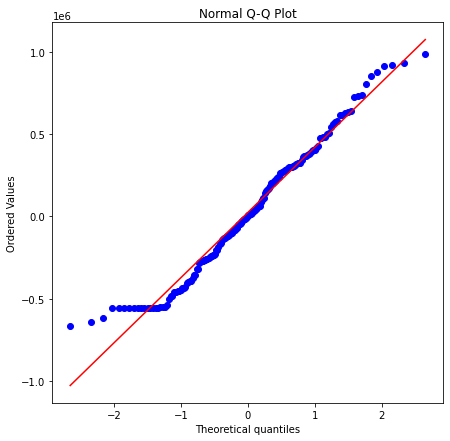

In [ ]:
reg = LinearRegression()

reg.fit(np.array(xTrain[["vaccination_policy"]], dtype = np.float64).reshape(-1, 1), yTrain)

predTest = reg.predict(np.array(xTest["vaccination_policy"]).reshape(-1,1))

residuals = yTest - predTest
residuals = np.array(residuals).reshape((174, ))

plt.figure(figsize=(7,7))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

Po przeanalizowaniu rozkładów rezyduów dla dwóch najlepszych modeli wybieram model dla zm. vaccination_policy, gdyż lepiej spełnia on założenia o regresji liniowej o rozkładzie rezyduów.

## Wybranie kolumn do regresji wielowymiarowej



In [ ]:
corr = dataLocal[colsConfirmed].corr()
corr.style.background_gradient(cmap='coolwarm')

,deaths,tests,vaccines,people_vaccinated,people_fully_vaccinated,school_closing,testing_policy,facial_coverings,vaccination_policy
deaths,1.000000,0.948587,0.813568,0.838643,0.792297,-0.021464,0.835557,0.479814,0.904711
tests,0.948587,1.000000,0.933920,0.933585,0.909355,-0.076423,0.842247,0.298389,0.955999
vaccines,0.813568,0.933920,1.000000,0.991004,0.993165,-0.043339,0.834493,0.046877,0.942150
people_vaccinated,0.838643,0.933585,0.991004,1.000000,0.989437,-0.045755,0.833346,0.055223,0.960707
people_fully_vaccinated,0.792297,0.909355,0.993165,0.989437,1.000000,-0.042178,0.843974,0.020944,0.941593
school_closing,-0.021464,-0.076423,-0.043339,-0.045755,-0.042178,1.000000,-0.058578,-0.080804,-0.032516
testing_policy,0.835557,0.842247,0.834493,0.833346,0.843974,-0.058578,1.000000,0.412298,0.839280
facial_coverings,0.479814,0.298389,0.046877,0.055223,0.020944,-0.080804,0.412298,1.000000,0.162526
vaccination_policy,0.904711,0.955999,0.942150,0.960707,0.941593,-0.032516,0.839280,0.162526,1.000000


Do regresji wielowymiarowej wybieram kolumny: 
<br>
1. vaccination_policy
2. school_closing	
3. facial_coverings


## Model regresji wielorakiej 

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(dataLocal[["vaccination_policy", "school_closing", "facial_coverings"]], dataLocal[["deaths"]], 
                                            test_size=0.2, random_state=0)

Należy sprawdzić czy i jak wybrane zmienne różnią się magnitudą i dokonać ewentualnego skalowania:

In [ ]:
print(min(xTrain['vaccination_policy']), max(xTrain['vaccination_policy']))
print(min(xTrain['school_closing']), max(xTrain['school_closing']))
print(min(xTrain['facial_coverings']), max(xTrain['facial_coverings']))

0.0 5.0
-3.0 3.0
0.0 4.0


In [ ]:
mreg = LinearRegression()

mreg.fit(xTrain, yTrain)

predTrain = mreg.predict(xTrain)
predTest = mreg.predict(xTest)

In [ ]:
r2Train = r2_score(yTrain, predTrain)
r2Test = r2_score(yTest, predTest)
rmseTrain = np.sqrt(mean_squared_error(yTrain, predTrain))
rmseTest = np.sqrt(mean_squared_error(yTest, predTest))

resDeathsGlobal.loc["regresja wielowymiarowa", :] =  [r2Train, r2Test, rmseTrain, rmseTest]

In [ ]:
resDeathsGlobal

,R2 train,R2 test,RMSE train,RMSE test
confirmed,0.898169,0.900635,587772.833715,547649.431751
tests,0.951477,0.95061,405736.838595,386104.846013
vaccines,0.803141,0.784798,817235.617241,805952.917717
people_vaccinated,0.858797,0.840711,692135.294586,693393.356632
people_fully_vaccinated,0.776508,0.755498,870763.593959,859068.414436
school_closing,0.257939,0.237202,1586679.256216,1517368.035187
testing_policy,0.623316,0.602038,1130467.575298,1095991.719596
facial_coverings,0.391343,0.337447,1436996.528772,1414153.742655
vaccination_policy,0.946318,0.948017,426761.570801,396109.663236
regresja wielowymiarowa,0.931189,0.940628,7882.826027,7850.502341


R2 delikatnie niższe ale rmse znacznie nizsze dlatego uznajemy dla tego przypadku model regresji wielowymiarowej za najlepszy do tej pory 

## SVR 

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(dataLocal[["date", "vaccination_policy", "school_closing", "facial_coverings"]], dataLocal[["deaths"]], 
                                            test_size=0.2, random_state=0)

In [ ]:
scaler = StandardScaler()

xTrainScaled = scaler.fit_transform(xTrain[["vaccination_policy", "school_closing", "facial_coverings"]])
xTestScaled = scaler.transform(xTest[["vaccination_policy", "school_closing", "facial_coverings"]])

In [ ]:
svr = SVR()

svr.fit(xTrainScaled, yTrain)

predTrain = svr.predict(xTrainScaled)
predTest = svr.predict(xTestScaled)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


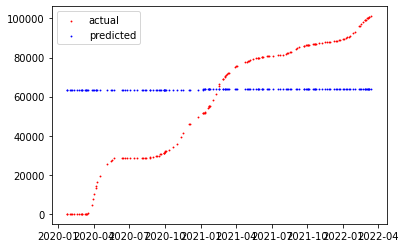

In [ ]:
plt.scatter( xTest[['date']], yTest, s=0.75, c='r', marker="o", label = "actual")
plt.scatter( xTest[['date']], predTest, s=0.75, c='b', marker="o", label = "predicted")
plt.legend()
plt.show()

In [ ]:
print(r2_score(yTrain, predTrain))
print(r2_score(yTest, predTest))
print(np.sqrt(mean_squared_error(yTrain, predTrain)))
print(np.sqrt(mean_squared_error(yTest, predTest)))

-0.05306964122020297
-0.023935215974794533
30837.751483196305
32601.946061997398


## Drzewa regresyjne

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(dataLocal[["date", "vaccination_policy", "school_closing", "facial_coverings"]], dataLocal[["deaths"]], 
                                            test_size=0.2, random_state=0)

In [ ]:
regTree = DecisionTreeRegressor()

regTree.fit(xTrain[["vaccination_policy", "school_closing", "facial_coverings"]], yTrain)

predTrain = regTree.predict(xTrain[["vaccination_policy", "school_closing", "facial_coverings"]])
predTest = regTree.predict(xTest[["vaccination_policy", "school_closing", "facial_coverings"]])

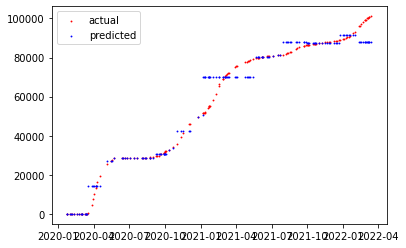

In [ ]:
plt.scatter( xTest[['date']], yTest, s=0.75, c='r', marker="o", label = "actual")
plt.scatter( xTest[['date']], predTest, s=0.75, c='b', marker="o", label = "predicted")
plt.legend()
plt.show()

In [ ]:
print(r2_score(yTrain, predTrain))
print(r2_score(yTest, predTest))
print(np.sqrt(mean_squared_error(yTrain, predTrain)))
print(np.sqrt(mean_squared_error(yTest, predTest)))

0.9731581835007604
0.9653131826274408
4923.343181923722
6000.528620427211


## Las losowy

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(dataLocal[["date", "vaccination_policy", "school_closing", "facial_coverings"]], dataLocal[["deaths"]], 
                                            test_size=0.2, random_state=0)

In [ ]:
RF = RandomForestClassifier()

RF.fit(xTrain[["vaccination_policy", "school_closing", "facial_coverings"]], np.array(yTrain).ravel())

predTrain = RF.predict(xTrain[["vaccination_policy", "school_closing", "facial_coverings"]])
predTest = RF.predict(xTest[["vaccination_policy", "school_closing", "facial_coverings"]])

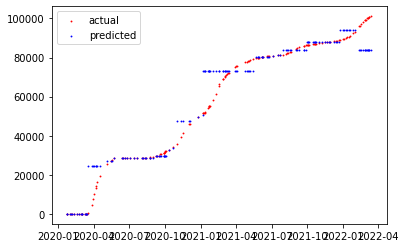

In [ ]:
plt.scatter( xTest[['date']], yTest, s=0.75, c='r', marker="o", label = "actual")
plt.scatter( xTest[['date']], predTest, s=0.75, c='b', marker="o", label = "predicted")
plt.legend()
plt.show()

In [ ]:
print(r2_score(yTrain, predTrain))
print(r2_score(yTest, predTest))
print(np.sqrt(mean_squared_error(yTrain, predTrain)))
print(np.sqrt(mean_squared_error(yTest, predTest)))

0.9590307540442289
0.9425448704843649
6082.514364309016
7722.74488758538


## Podsumowanie

Algorytm SVR nie działa dla zadanageo przykładu.
<br>
Algorytmy drzew regresyjnych i lasu losowego sprawdziły się o czym świadczy mertyka r2 na poziomie > 0.95. Jednak RMSE dla obu metod sugeruje, że nastąpiło przeuczenie

## Podsumowanie ogólne

Celem projektu była predykcja lokalnej i globalnej liczby:
1. zachorowań
2. zgonów
<br><br>
Przed przystąpieniem do pracy, założyłam, iż predykcja lokalna będzie możliwa, w przeciwieństwie do predykcji dla całego zbioru.
<br><br>
Podstawą wykonania zadania była analiza obserwacji. Z racji, że przypadki lokalny i globalny różniły się od siebie trzeba było rozpatrywać je osobno. Był to najważniejszy element całego projektu.
<br><br>
Na podstawie zbiorów zostały utworzone modele, osobno dla obu zmiennych.
<br><br>
Użyte metody:
* regresja liniowa
* regresja wieloraka
* SVR
* drzewa decyzyjne
* las losowy
<br><br>
Jakość każdej z predykcji została przeanalizowana i oceniona.
<br><br>
Uważam, że predykcja nie była wiarygodna. Mimo, że wyniki uzyskane przez modele były dobre (metryka r@) to założenia regresji liniowej nie były spełnione a pozostałe metody miały skłonności do overfittingu lub nie działały.
<br><br>
Założenie potwierdziło się, problem może być rozpatrywany globalnie, gdy bierzemy pod uwagę państwa, które raportują w podobny sposób a dostarczane obserwacje nie zawierają dużych braków dla kluczowych zmiennych. W przeciwnym wypadku proces byłby zaburzony.
<br><br>
Myślę, że dokładniejsza analiza zbioru i jego staranniejsze przygotowanie miałaby znaczący wpływ na jakość i wiarygodność wyników. 
<br><br>
Przeprowadzona analiza ukazuje, że liczba wykonanych testów ma największy wpływ na predykowane zmienne ale też restrykcje rządowe tj. polityka szczepienna czy zakrywanie twarzy również są istotne.